<a href="https://colab.research.google.com/github/Owen-Senowitz/CSCI-6020-Machine-Learning-Project/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ Define your dataset path (Colab environment)
data_path = "/content/data/15_minute_timeseries_data_cleaned.xlsx"

import pandas as pd
df = pd.read_excel(data_path)

print("✅ Data loaded successfully!")
print(df.shape)
df.head()


✅ Data loaded successfully!
(35040, 51)


Timestamp (EST)  \
0  2018-01-01 00:15:00-05:00   
1  2018-01-01 00:30:00-05:00   
2  2018-01-01 00:45:00-05:00   
3  2018-01-01 01:00:00-05:00   
4  2018-01-01 01:15:00-05:00   

   baseline.out.district_cooling.cooling.energy_consumption.kwh  \
0                                        1261.487893              
1                                        1261.554287              
2                                        1297.018583              
3                                        1286.558019              
4                                        1338.989045              

   baseline.out.district_heating.heating.energy_consumption.kwh  \
0                                       29601.912788              
1                                       29271.450225              
2                                       28838.777283              
3                                       28368.260018              
4                                       28468.667114              

   baseline.out.district_heating.water_systems.energy_consumption.kwh  \
0                                         309.855565                    
1                                         349.563374                    
2                                         367.571143                    
3                                         324.888025                    
4                                         305.254623                    

   baseline.out.electricity.cooling.energy_consumption.kwh  \
0                                        4605.537401         
1                                        4707.895516         
2                                        4526.877575         
3                                        4786.123862         
4                                        4717.164200         

   baseline.out.electricity.exterior_lighting.energy_consumption.kwh  \
0                                      107497.300566                   
1                                      107497.300566                   
2                                      107497.300566                   
3                                      107497.300566                   
4                                      107497.300566                   

   baseline.out.electricity.fans.energy_consumption.kwh  \
0                                      124738.047421      
1                                      123125.810732      
2                                      121764.419053      
3                                      121122.112774      
4                                      117533.637801      

   baseline.out.electricity.heat_recovery.energy_consumption.kwh  \
0                                         892.050135               
1                                         932.535835               
2                                         896.617532               
3                                         907.336711               
4                                         893.429596               

   baseline.out.electricity.heat_rejection.energy_consumption.kwh  \
0                                           0.229499                
1                                           0.228373                
2                                           0.228817                
3                                           0.281473                
4                                           0.300363                

   baseline.out.electricity.heating.energy_consumption.kwh  ...  \
0                                      763013.030655        ...   
1                                      752519.579094        ...   
2                                      738530.222116        ...   
3                                      732711.497407        ...   
4                                      729152.579101        ...   

   upgrade.out.natural_gas.interior_equipment.energy_consumption.kwh  \
0                                       24684.850711                   
1                                       240

In [ ]:
# 🧹 Step 2: Data Cleaning & Feature Engineering
import numpy as np

print("🧩 Starting data cleaning and feature engineering...")

# 1️⃣ Inspect structure
print("Initial columns:", len(df.columns))
print("Missing values per column (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

# 2️⃣ Drop completely empty columns
df = df.dropna(axis=1, how='all')

# 3️⃣ Drop duplicate rows if any
df = df.drop_duplicates()

# 4️⃣ Detect timestamp column automatically
time_cols = [c for c in df.columns if "time" in c.lower() or "date" in c.lower()]
if time_cols:
    time_col = time_cols[0]
else:
    time_col = df.columns[0]  # fallback
print(f"⏱ Using '{time_col}' as timestamp column")

# 5️⃣ Convert to datetime and set as index
df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
df = df.set_index(time_col).sort_index()

# 6️⃣ Remove rows with invalid or missing timestamps
df = df[~df.index.isna()]

# 7️⃣ Convert all numeric-like columns to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 8️⃣ Handle missing numeric data
df = df.interpolate(method='time', limit_direction='both')

# 9️⃣ Remove negative or unrealistic power values
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df.loc[df[col] < 0, col] = np.nan
df = df.interpolate(method='time')

# 🔟 Add time-based features
df["hour"] = df.index.hour
df["day_of_week"] = df.index.dayofweek
df["month"] = df.index.month
df["day_of_year"] = df.index.dayofyear
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

# ✅ Final summary
print("✅ Cleaned dataset shape:", df.shape)
print("✅ Time range:", df.index.min(), "to", df.index.max())

# Optional: Save a cleaned copy
df.to_csv("/content/data/15_minute_timeseries_data_cleaned_ready.csv")
print("💾 Saved cleaned dataset → /content/data/15_minute_timeseries_data_cleaned_ready.csv")

# Preview
df.head()


🧩 Starting data cleaning and feature engineering...
Initial columns: 51
Missing values per column (top 10):
Timestamp (EST)                                                       0
baseline.out.district_cooling.cooling.energy_consumption.kwh          0
baseline.out.district_heating.heating.energy_consumption.kwh          0
baseline.out.district_heating.water_systems.energy_consumption.kwh    0
baseline.out.electricity.cooling.energy_consumption.kwh               0
baseline.out.electricity.exterior_lighting.energy_consumption.kwh     0
baseline.out.electricity.fans.energy_consumption.kwh                  0
baseline.out.electricity.heat_recovery.energy_consumption.kwh         0
baseline.out.electricity.heat_rejection.energy_consumption.kwh        0
baseline.out.electricity.heating.energy_consumption.kwh               0
dtype: int64
⏱ Using 'Timestamp (EST)' as timestamp column
✅ Cleaned dataset shape: (35040, 55)
✅ Time range: 2018-01-01 00:15:00-05:00 to 2019-01-01 00:00:00-05:00
💾 Saved

baseline.out.district_cooling.cooling.energy_consumption.kwh  \
Timestamp (EST)                                                                           
2018-01-01 00:15:00-05:00                                        1261.487893              
2018-01-01 00:30:00-05:00                                        1261.554287              
2018-01-01 00:45:00-05:00                                        1297.018583              
2018-01-01 01:00:00-05:00                                        1286.558019              
2018-01-01 01:15:00-05:00                                        1338.989045              

                           baseline.out.district_heating.heating.energy_consumption.kwh  \
Timestamp (EST)                                                                           
2018-01-01 00:15:00-05:00                                       29601.912788              
2018-01-01 00:30:00-05:00                                       29271.450225              
2018-01-01 00:45:00-05:00                                       28838.777283              
2018-01-01 01:00:00-05:00                                       28368.260018              
2018-01-01 01:15:00-05:00                                       28468.667114              

                           baseline.out.district_heating.water_systems.energy_consumption.kwh  \
Timestamp (EST)                                                                                 
2018-01-01 00:15:00-05:00                                         309.855565                    
2018-01-01 00:30:00-05:00                                         349.563374                    
2018-01-01 00:45:00-05:00                                         367.571143                    
2018-01-01 01:00:00-05:00                                         324.888025                    
2018-01-01 01:15:00-05:00                                         305.254623                    

                           baseline.out.electricity.cooling.energy_consumption.kwh  \
Timestamp (EST)                                                                      
2018-01-01 00:15:00-05:00                                        4605.537401         
2018-01-01 00:30:00-05:00                                        4707.895516         
2018-01-01 00:45:00-05:00                                        4526.877575         
2018-01-01 01:00:00-05:00                                        4786.123862         
2018-01-01 01:15:00-05:00                                        4717.164200         

                           baseline.out.electricity.exterior_lighting.energy_consumption.kwh  \
Timestamp (EST)                                                                                
2018-01-01 00:15:00-05:00                                      107497.300566                   
2018-01-01 00:30:00-05:00                                      107497.300566                   
2018-01-01 00:45:00-05:00                                      107497.300566                   
2018-01-01 01:00:00-05:00                                      107497.300566                   
2018-01-01 01:15:00-05:00                                      107497.300566                   

                           baseline.out.electricity.fans.energy_consumption.kwh  \
Timestamp (EST)                                                                   
2018-01-01 00:15:00-05:00                                      124738.047421      
2018-01-01 00:30:00-05:00                                      123125.810732      
2018-01-01 00:45:00-05:00                                      121764.419053      
2018-01-01 01:00:00-05:00                                      121122.112774      
2018-01-01 01:15:00-05:00                                      117533.637801      

                           baseline.out.electricity.heat_recovery.energy_consumption.kwh  \
Timestamp (EST)                                                                            
2018-01-01 00:15:00-05:00    

In [ ]:
# 🕒 Step 3: Create hourly dataset from 15-minute data (and save a copy)

import pandas as pd
import numpy as np

print("⏱️ Aggregating 15-minute data into hourly intervals...")

# Make sure datetime index exists
if not isinstance(df.index, pd.DatetimeIndex):
    raise ValueError("❌ The dataset index must be a DatetimeIndex. Make sure data cleaning step is completed.")

# Function to decide whether to sum or average
def aggregate_hourly(df):
    hourly_df = pd.DataFrame()

    for col in df.columns:
        # Decide if column represents energy (to SUM) or power (to MEAN)
        col_lower = col.lower()
        if any(keyword in col_lower for keyword in ["kwh", "energy", "consumption"]):
            hourly_df[col] = df[col].resample("H").sum(min_count=1)
        elif any(keyword in col_lower for keyword in ["kw", "power"]):
            hourly_df[col] = df[col].resample("H").mean()
        else:
            # Non-numeric / categorical features should take mode or forward fill
            if df[col].dtype == 'object':
                hourly_df[col] = df[col].resample("H").ffill()
            else:
                hourly_df[col] = df[col].resample("H").mean()

    return hourly_df

# Perform aggregation
hourly_df = aggregate_hourly(df)

# Clean up after aggregation
hourly_df = hourly_df.interpolate(method='time', limit_direction='both')

# Summary
print("✅ Hourly dataset created successfully!")
print(f"Rows: {hourly_df.shape[0]} | Columns: {hourly_df.shape[1]}")
print(f"Time range: {hourly_df.index.min()} to {hourly_df.index.max()}")

# Save a copy
hourly_path = "/content/data/hourly_from_15min.csv"
hourly_df.to_csv(hourly_path)
print(f"💾 Saved hourly dataset to {hourly_path}")

# Preview first few rows
hourly_df.head()


⏱️ Aggregating 15-minute data into hourly intervals...
✅ Hourly dataset created successfully!
Rows: 8761 | Columns: 55
Time range: 2018-01-01 00:00:00-05:00 to 2019-01-01 00:00:00-05:00


/tmp/ipython-input-293919988.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df[col] = df[col].resample("H").sum(min_count=1)
/tmp/ipython-input-293919988.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df[col] = df[col].resample("H").sum(min_count=1)
/tmp/ipython-input-293919988.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df[col] = df[col].resample("H").sum(min_count=1)
/tmp/ipython-input-293919988.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df[col] = df[col].resample("H").sum(min_count=1)
/tmp/ipython-input-293919988.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df[col] = df[col].resample("H").sum(min_count=1)
/tmp/ipython-input-293919988.py:20: Futu

💾 Saved hourly dataset to /content/data/hourly_from_15min.csv


baseline.out.district_cooling.cooling.energy_consumption.kwh  \
Timestamp (EST)                                                                           
2018-01-01 00:00:00-05:00                                        3820.060763              
2018-01-01 01:00:00-05:00                                        5113.649952              
2018-01-01 02:00:00-05:00                                        5084.872237              
2018-01-01 03:00:00-05:00                                        4535.336091              
2018-01-01 04:00:00-05:00                                        4368.049545              

                           baseline.out.district_heating.heating.energy_consumption.kwh  \
Timestamp (EST)                                                                           
2018-01-01 00:00:00-05:00                                       87712.140296              
2018-01-01 01:00:00-05:00                                      114002.483069              
2018-01-01 02:00:00-05:00                                      115755.237262              
2018-01-01 03:00:00-05:00                                      117919.681992              
2018-01-01 04:00:00-05:00                                      124848.204471              

                           baseline.out.district_heating.water_systems.energy_consumption.kwh  \
Timestamp (EST)                                                                                 
2018-01-01 00:00:00-05:00                                        1026.990082                    
2018-01-01 01:00:00-05:00                                        1219.889744                    
2018-01-01 02:00:00-05:00                                        1195.700168                    
2018-01-01 03:00:00-05:00                                        1182.421633                    
2018-01-01 04:00:00-05:00                                        1228.247642                    

                           baseline.out.electricity.cooling.energy_consumption.kwh  \
Timestamp (EST)                                                                      
2018-01-01 00:00:00-05:00                                       13840.310492         
2018-01-01 01:00:00-05:00                                       18725.582288         
2018-01-01 02:00:00-05:00                                       18084.137938         
2018-01-01 03:00:00-05:00                                       17742.494490         
2018-01-01 04:00:00-05:00                                       17244.322737         

                           baseline.out.electricity.exterior_lighting.energy_consumption.kwh  \
Timestamp (EST)                                                                                
2018-01-01 00:00:00-05:00                                      322491.901699                   
2018-01-01 01:00:00-05:00                                      429989.202265                   
2018-01-01 02:00:00-05:00                                      429989.202265                   
2018-01-01 03:00:00-05:00                                      429989.202265                   
2018-01-01 04:00:00-05:00                                      429989.202265                   

                           baseline.out.electricity.fans.energy_consumption.kwh  \
Timestamp (EST)                                                                   
2018-01-01 00:00:00-05:00                                      369628.277205      
2018-01-01 01:00:00-05:00                                      475220.212286      
2018-01-01 02:00:00-05:00                                      476934.930961      
2018-01-01 03:00:00-05:00                                      492488.199481      
2018-01-01 04:00:00-05:00                                      524018.180850      

                           baseline.out.electricity.heat_recovery.energy_consumption.kwh  \
Timestamp (EST)                                                                            
2018-01-01 00:00:00-05:00    

In [ ]:
# =========================
# ✂️ Step 4: Chronological 70/30 Train–Test Split (15-min + hourly)
# =========================
import pandas as pd
import numpy as np
from pathlib import Path

SAVE_DIR = Path("/content/data")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

TARGET_COL = "baseline.out.site_energy.total.energy_consumption.kwh"

def ensure_datetime_index(frame: pd.DataFrame, name: str) -> pd.DataFrame:
    if frame is None:
        return None
    if not isinstance(frame.index, pd.DatetimeIndex):
        # try first column as timestamp
        first_col = frame.columns[0]
        idx = pd.to_datetime(frame[first_col], errors="coerce")
        frame = frame.set_index(idx).drop(columns=[first_col])
    # drop tz if any, sort
    if getattr(frame.index, "tz", None) is not None:
        frame.index = frame.index.tz_localize(None)
    return frame.sort_index()

def build_hourly_from_15min(df_15: pd.DataFrame) -> pd.DataFrame:
    # sum for energy consumption target; mean for everything else
    agg = {c: ("sum" if c == TARGET_COL else "mean") for c in df_15.columns}
    return df_15.resample("1H").agg(agg)

def chronological_split(data: pd.DataFrame, train_frac=0.7):
    n_total = len(data)
    n_train = max(1, int(n_total * train_frac))
    return data.iloc[:n_train], data.iloc[n_train:]

# ---- Get/prepare datasets
if "df" not in globals() or not isinstance(df, pd.DataFrame) or df.empty:
    raise RuntimeError("Step 4 needs `df` (15-min) dataframe loaded.")

df_15 = ensure_datetime_index(df, "df (15-min)")

if "hourly_df" in globals() and isinstance(hourly_df, pd.DataFrame) and not hourly_df.empty:
    hourly_df = ensure_datetime_index(hourly_df, "hourly_df")
else:
    print("ℹ️ Building hourly_df from 15-min via resample('1H')…")
    hourly_df = build_hourly_from_15min(df_15)

# ---- Splits
train_15min, test_15min = chronological_split(df_15, 0.7)
train_hourly, test_hourly = chronological_split(hourly_df, 0.7)

# ---- Save splits
train_15min.to_csv(SAVE_DIR / "train_15min.csv")
test_15min.to_csv(SAVE_DIR / "test_15min.csv")
train_hourly.to_csv(SAVE_DIR / "train_hourly.csv")
test_hourly.to_csv(SAVE_DIR / "test_hourly.csv")

print("✅ Split complete and saved to /content/data")
print(f"15-min → Train {train_15min.shape}, Test {test_15min.shape}")
print(f"Hourly → Train {train_hourly.shape}, Test {test_hourly.shape}")


✅ Split complete and saved to /content/data
15-min → Train (24528, 55), Test (10512, 55)
Hourly → Train (6132, 55), Test (2629, 55)


In [ ]:
!pip install prophet --quiet


In [ ]:
# 🤖 Step 5 (Fixed): Modeling — SARIMAX, Prophet, Gradient Boosting, Ridge

print("🚀 Starting model training (fixed version)...")

# --- Import missing libs
import statsmodels.api as sm
from datetime import timezone

# --- Helper for evaluation
def evaluate_model(y_true, y_pred, name):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    print(f"\n📊 {name} Results")
    print(f"MAE : {mae:,.3f}")
    print(f"RMSE: {rmse:,.3f}")
    print(f"MAPE: {mape:,.2f}%")
    return {"Model": name, "MAE": mae, "RMSE": rmse, "MAPE": mape}

# --- Target
target_col = "baseline.out.site_energy.total.energy_consumption.kwh"

y_train = train_hourly[target_col]
y_test = test_hourly[target_col]
results = []

# =========================================================
# 1️⃣ SARIMAX
# =========================================================
try:
    print("⏳ Training SARIMAX model...")
    sarimax_model = sm.tsa.statespace.SARIMAX(
        y_train,
        order=(1,1,1),
        seasonal_order=(1,1,1,24),
        enforce_stationarity=False,
        enforce_invertibility=False
    ).fit(disp=False)

    sarimax_pred = sarimax_model.forecast(steps=len(y_test))
    results.append(evaluate_model(y_test, sarimax_pred, "SARIMAX"))
except Exception as e:
    print("❌ SARIMAX failed:", e)

# =========================================================
# 2️⃣ Prophet (now handles timezone)
# =========================================================
try:
    from prophet import Prophet

    print("⏳ Training Prophet model...")
    prophet_df = y_train.reset_index()
    prophet_df.columns = ["ds", "y"]

    # Remove timezone if present
    if hasattr(prophet_df["ds"].iloc[0], "tzinfo"):
        prophet_df["ds"] = prophet_df["ds"].dt.tz_localize(None)

    prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
    prophet_model.fit(prophet_df)

    future = y_test.reset_index()[["timestamp"]].rename(columns={"timestamp": "ds"})
    if hasattr(future["ds"].iloc[0], "tzinfo"):
        future["ds"] = future["ds"].dt.tz_localize(None)

    forecast = prophet_model.predict(future)
    y_pred_prophet = forecast["yhat"].values

    results.append(evaluate_model(y_test.values, y_pred_prophet, "Prophet"))
except Exception as e:
    print("⚠️ Prophet not installed or failed:", e)

# =========================================================
# 3️⃣ Gradient Boosting
# =========================================================
try:
    from sklearn.ensemble import GradientBoostingRegressor

    print("⏳ Training Gradient Boosting model...")
    X_train = pd.DataFrame({
        "hour": train_hourly.index.hour,
        "day_of_week": train_hourly.index.dayofweek,
        "month": train_hourly.index.month
    })
    X_test = pd.DataFrame({
        "hour": test_hourly.index.hour,
        "day_of_week": test_hourly.index.dayofweek,
        "month": test_hourly.index.month
    })

    gbr = GradientBoostingRegressor(random_state=42)
    gbr.fit(X_train, y_train)
    y_pred_gbr = gbr.predict(X_test)

    results.append(evaluate_model(y_test, y_pred_gbr, "Gradient Boosting"))
except Exception as e:
    print("❌ Gradient Boosting failed:", e)

# =========================================================
# 4️⃣ Ridge Regression
# =========================================================
try:
    from sklearn.linear_model import Ridge
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import make_pipeline

    print("⏳ Training Ridge Regression model...")
    ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)

    results.append(evaluate_model(y_test, y_pred_ridge, "Ridge Regression"))
except Exception as e:
    print("❌ Ridge Regression failed:", e)

# =========================================================
# 🏁 Scoreboard
# =========================================================
scoreboard = pd.DataFrame(results).sort_values("RMSE")
print("\n🏆 Final Model Scoreboard:")
display(scoreboard)


🚀 Starting model training (fixed version)...
⏳ Training SARIMAX model...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)



📊 SARIMAX Results
MAE : 3,163,030.571
RMSE: 3,963,372.236
MAPE: 82.13%
⏳ Training Prophet model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmptnm5xf64/r6_b6qs4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptnm5xf64/5bsy9cyz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25062', 'data', 'file=/tmp/tmptnm5xf64/r6_b6qs4.json', 'init=/tmp/tmptnm5xf64/5bsy9cyz.json', 'output', 'file=/tmp/tmptnm5xf64/prophet_modelr2k23lgq/prophet_model-20251024045950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:59:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:59:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


⚠️ Prophet not installed or failed: "None of [Index(['timestamp'], dtype='object')] are in the [columns]"
⏳ Training Gradient Boosting model...

📊 Gradient Boosting Results
MAE : 1,002,167.188
RMSE: 1,307,373.379
MAPE: 24.03%
⏳ Training Ridge Regression model...

📊 Ridge Regression Results
MAE : 1,163,369.232
RMSE: 1,464,722.639
MAPE: 30.46%

🏆 Final Model Scoreboard:


Model           MAE          RMSE       MAPE
1  Gradient Boosting  1.002167e+06  1.307373e+06  24.031343
2   Ridge Regression  1.163369e+06  1.464723e+06  30.464181
0            SARIMAX  3.163031e+06  3.963372e+06  82.127273

In [ ]:
# =========================
# STEP 5 — TRAIN MODELS (Hourly + 15-min) from /content/data/
# =========================
import warnings, logging
warnings.filterwarnings("ignore")
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)
logging.getLogger("prophet").setLevel(logging.WARNING)

import os
from pathlib import Path
import numpy as np
import pandas as pd
import statsmodels.api as sm
from prophet import Prophet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib

DATA_DIR   = Path("/content/data")
MODEL_DIR  = Path("/content/models")
OUTPUT_DIR = Path("/content/analysis_outputs")
MODEL_DIR.mkdir(parents=True, exist_ok=True)
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

TARGET_COL = "baseline.out.site_energy.total.energy_consumption.kwh"

# ---------- Speed toggles for 15-min heavy models ----------
FAST_MODE = True          # keep fast mode so it won’t hang
MAX_15MIN_DAYS = 30       # train heavy models on last 30 days
SKIP_15MIN_SARIMAX = False   # <— enable SARIMAX for 15-min
SKIP_15MIN_PROPHET = False   # <— enable Prophet for 15-min

SARIMAX_MAXITER = 60
SARIMAX_SIMPLE_DIFF = True


def _read_split_csv(path: Path) -> pd.DataFrame:
    """Load a split CSV and build a tz-naive DateTimeIndex from its first column."""
    df = pd.read_csv(path)
    first = df.columns[0]
    dt_idx = pd.to_datetime(df[first], errors="coerce")
    df = df.set_index(dt_idx).drop(columns=[first])
    if getattr(df.index, "tz", None) is not None:
        df.index = df.index.tz_localize(None)
    return df.sort_index()

def _tail_days(df: pd.DataFrame, days: int) -> pd.DataFrame:
    if df.empty or not isinstance(df.index, pd.DatetimeIndex):
        return df
    cutoff = df.index.max() - pd.Timedelta(days=days)
    return df.loc[df.index >= cutoff]

def _time_features(idx: pd.DatetimeIndex, gran: str) -> pd.DataFrame:
    if gran == "hourly":
        return pd.DataFrame({"hour": idx.hour, "day_of_week": idx.dayofweek, "month": idx.month}, index=idx)
    # 15-min extras: minute + quarter
    return pd.DataFrame({
        "hour": idx.hour,
        "minute": idx.minute,
        "quarter": (idx.minute // 15),
        "day_of_week": idx.dayofweek,
        "month": idx.month
    }, index=idx)

def _train_one(gran: str, train_path: Path):
    print(f"\n==============================\nTRAINING: {gran.upper()} from {train_path.name}\n==============================")
    df = _read_split_csv(train_path)
    if TARGET_COL not in df.columns:
        raise KeyError(f"[{gran}] '{TARGET_COL}' missing in {train_path}.")

    y = df[TARGET_COL].astype(float)
    X = _time_features(df.index, gran)
    out_dir = MODEL_DIR / gran
    out_dir.mkdir(parents=True, exist_ok=True)

    # ---- SARIMAX (forecast only needs y_train) ----
    if not (gran == "15min" and FAST_MODE and SKIP_15MIN_SARIMAX):
        try:
            sp = 24 if gran == "hourly" else 96
            y_for_sarimax = y if gran == "hourly" else (_tail_days(df, MAX_15MIN_DAYS)[TARGET_COL].astype(float) if FAST_MODE else y)
            print(f"⏳ [{gran}] SARIMAX training (seasonal_period={sp}) ...")
            sarimax = sm.tsa.statespace.SARIMAX(
                y_for_sarimax,
                order=(1,1,1),
                seasonal_order=(1,1,1, sp),
                simple_differencing=SARIMAX_SIMPLE_DIFF,
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit(disp=False, maxiter=SARIMAX_MAXITER)
            joblib.dump({"model": sarimax, "seasonal_period": sp, "train_end": y_for_sarimax.index.max()}, out_dir / "sarimax.joblib")
            print(f"✅ [{gran}] SARIMAX saved.")
        except Exception as e:
            print(f"❌ [{gran}] SARIMAX failed:", e)
    else:
        print(f"⏭️ [{gran}] Skipping SARIMAX (FAST_MODE).")

    # ---- Prophet ----
    if not (gran == "15min" and FAST_MODE and SKIP_15MIN_PROPHET):
        try:
            print(f"⏳ [{gran}] Prophet training ...")
            y_for_prophet = y if gran == "hourly" else (_tail_days(df, MAX_15MIN_DAYS)[TARGET_COL].astype(float) if FAST_MODE else y)
            ptrain = y_for_prophet.reset_index()
            ptrain.columns = ["ds", "y"]
            if hasattr(ptrain["ds"].iloc[0], "tzinfo"):
                ptrain["ds"] = ptrain["ds"].dt.tz_localize(None)
            prophet = Prophet(
                yearly_seasonality=(gran == "hourly"),
                weekly_seasonality=True,
                daily_seasonality=True,
                changepoint_prior_scale=0.1
            )
            prophet.fit(ptrain)
            joblib.dump(prophet, out_dir / "prophet.joblib")
            print(f"✅ [{gran}] Prophet saved.")
        except Exception as e:
            print(f"⚠️ [{gran}] Prophet failed:", e)
    else:
        print(f"⏭️ [{gran}] Skipping Prophet (FAST_MODE).")

    # ---- Gradient Boosting (uses X, y) ----
    try:
        print(f"⏳ [{gran}] Gradient Boosting training ...")
        gbr = GradientBoostingRegressor(random_state=42)
        gbr.fit(X, y)
        joblib.dump({"model": gbr, "features": X.columns.tolist()}, out_dir / "gbr.joblib")
        print(f"✅ [{gran}] GBR saved.")
    except Exception as e:
        print(f"❌ [{gran}] GBR failed:", e)

    # ---- Ridge (pipeline with scaler) ----
    try:
        print(f"⏳ [{gran}] Ridge training ...")
        ridge = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=1.0))
        ridge.fit(X, y)
        joblib.dump({"model": ridge, "features": X.columns.tolist()}, out_dir / "ridge.joblib")
        print(f"✅ [{gran}] Ridge saved.")
    except Exception as e:
        print(f"❌ [{gran}] Ridge failed:", e)

# Train both granularities from /content/data/
_train_one("hourly", DATA_DIR / "train_hourly.csv")
_train_one("15min",  DATA_DIR / "train_15min.csv")

print("\n✅ Step 5 complete — all available models trained and saved to /content/models/{hourly,15min}")



TRAINING: HOURLY from train_hourly.csv
⏳ [hourly] SARIMAX training (seasonal_period=24) ...
✅ [hourly] SARIMAX saved.
⏳ [hourly] Prophet training ...
✅ [hourly] Prophet saved.
⏳ [hourly] Gradient Boosting training ...
✅ [hourly] GBR saved.
⏳ [hourly] Ridge training ...
✅ [hourly] Ridge saved.

TRAINING: 15MIN from train_15min.csv
⏳ in] SARIMAX training (seasonal_period=96) ...
✅ in] SARIMAX saved.
⏳ in] Prophet training ...
✅ in] Prophet saved.
⏳ in] Gradient Boosting training ...
✅ in] GBR saved.
⏳ in] Ridge training ...
✅ in] Ridge saved.

✅ Step 5 complete — all available models trained and saved to /content/models/{hourly,15min}


In [ ]:
# =========================
# STEP 6 — PREDICT WITH TRAINED MODELS (Hourly + 15-min)
# =========================
import warnings, logging
warnings.filterwarnings("ignore")
logging.getLogger("cmdstanpy").setLevel(logging.WARNING)
logging.getLogger("prophet").setLevel(logging.WARNING)

from pathlib import Path
import numpy as np
import pandas as pd
import statsmodels.api as sm
import joblib

DATA_DIR   = Path("/content/data")
MODEL_DIR  = Path("/content/models")
OUT_BASE   = Path("/content/analysis_outputs")
PRED_DIRS  = {"hourly": OUT_BASE / "preds_hourly", "15min": OUT_BASE / "preds_15min"}
for p in PRED_DIRS.values():
    p.mkdir(parents=True, exist_ok=True)

TARGET_COL = "baseline.out.site_energy.total.energy_consumption.kwh"

def _read_split_csv(path: Path) -> pd.DataFrame:
    df = pd.read_csv(path)
    first = df.columns[0]
    dt_idx = pd.to_datetime(df[first], errors="coerce")
    df = df.set_index(dt_idx).drop(columns=[first])
    if getattr(df.index, "tz", None) is not None:
        df.index = df.index.tz_localize(None)
    return df.sort_index()

def _time_features(idx: pd.DatetimeIndex, gran: str) -> pd.DataFrame:
    if gran == "hourly":
        return pd.DataFrame({"hour": idx.hour, "day_of_week": idx.dayofweek, "month": idx.month}, index=idx)
    return pd.DataFrame({
        "hour": idx.hour,
        "minute": idx.minute,
        "quarter": (idx.minute // 15),
        "day_of_week": idx.dayofweek,
        "month": idx.month
    }, index=idx)

def _predict_one(gran: str, test_path: Path):
    print(f"\n==============================\nPREDICT: {gran.upper()} from {test_path.name}\n==============================")
    df_test = _read_split_csv(test_path)

    # Save/Expose ground truth for scoring in later steps (we won’t use it to fit)
    if TARGET_COL not in df_test.columns:
        raise KeyError(f"[{gran}] '{TARGET_COL}' missing in {test_path}.")
    y_test = df_test[TARGET_COL].astype(float)
    globals()["y_test" if gran=="hourly" else "y_test_15min"] = y_test

    # Build features for ML models
    X_test = _time_features(df_test.index, gran)

    # Output dir
    out_dir = PRED_DIRS[gran]
    # Save y_test for later steps (Step 7/8)
    y_test.to_csv(out_dir / f"y_test_{gran}.csv")

    # ========== SARIMAX ==========
    sarimax_file = MODEL_DIR / gran / "sarimax.joblib"
    if sarimax_file.exists():
        try:
            bundle = joblib.load(sarimax_file)
            sarimax = bundle["model"]
            # Forecast exactly the length of the test horizon
            yhat = sarimax.forecast(steps=len(y_test))
            yhat = pd.Series(yhat, index=y_test.index, name="SARIMAX")
            yhat.to_csv(out_dir / "pred_SARIMAX.csv")
            globals()["sarimax_pred" if gran=="hourly" else "sarimax_pred_15min"] = yhat
            print(f"✅ [{gran}] SARIMAX predictions saved.")
        except Exception as e:
            print(f"❌ [{gran}] SARIMAX prediction failed:", e)
    else:
        print(f"ℹ️ [{gran}] SARIMAX model not found — skipping.")

    # ========== Prophet ==========
    prophet_file = MODEL_DIR / gran / "prophet.joblib"
    if prophet_file.exists():
        try:
            prophet = joblib.load(prophet_file)
            future = pd.DataFrame({"ds": pd.to_datetime(y_test.index)})
            if hasattr(future["ds"].iloc[0], "tzinfo"):
                future["ds"] = future["ds"].dt.tz_localize(None)
            fc = prophet.predict(future)
            yhat = pd.Series(fc["yhat"].values, index=y_test.index, name="Prophet")
            yhat.to_csv(out_dir / "pred_Prophet.csv")
            if gran == "hourly":
                globals()["y_pred_prophet"] = yhat
            else:
                globals()["y_pred_prophet_15min"] = yhat
            print(f"✅ [{gran}] Prophet predictions saved.")
        except Exception as e:
            print(f"⚠️ [{gran}] Prophet prediction failed:", e)
    else:
        print(f"ℹ️ [{gran}] Prophet model not found — skipping.")

    # ========== Gradient Boosting ==========
    gbr_file = MODEL_DIR / gran / "gbr.joblib"
    if gbr_file.exists():
        try:
            bundle = joblib.load(gbr_file)
            gbr = bundle["model"]; feat = bundle["features"]
            X_aligned = X_test[feat]
            yhat = pd.Series(gbr.predict(X_aligned), index=y_test.index, name="GradientBoosting")
            yhat.to_csv(out_dir / "pred_GradientBoosting.csv")
            if gran == "hourly":
                globals()["y_pred_gbr"] = yhat
            else:
                globals()["y_pred_gbr_15min"] = yhat
                globals()["y15_pred_gbr"] = yhat  # legacy alias
            print(f"✅ [{gran}] GBR predictions saved.")
        except Exception as e:
            print(f"❌ [{gran}] GBR prediction failed:", e)
    else:
        print(f"ℹ️ [{gran}] GBR model not found — skipping.")

    # ========== Ridge ==========
    ridge_file = MODEL_DIR / gran / "ridge.joblib"
    if ridge_file.exists():
        try:
            bundle = joblib.load(ridge_file)
            ridge = bundle["model"]; feat = bundle["features"]
            X_aligned = X_test[feat]
            yhat = pd.Series(ridge.predict(X_aligned), index=y_test.index, name="Ridge")
            yhat.to_csv(out_dir / "pred_Ridge.csv")
            if gran == "hourly":
                globals()["y_pred_ridge"] = yhat
            else:
                globals()["y_pred_ridge_15min"] = yhat
                globals()["y15_pred_ridge"] = yhat  # legacy alias
            print(f"✅ [{gran}] Ridge predictions saved.")
        except Exception as e:
            print(f"❌ [{gran}] Ridge prediction failed:", e)
    else:
        print(f"ℹ️ [{gran}] Ridge model not found — skipping.")

# Predict for both granularities from /content/data/test_*.csv
_predict_one("hourly", DATA_DIR / "test_hourly.csv")
_predict_one("15min",  DATA_DIR / "test_15min.csv")

print("\n✅ Step 6 complete — predictions written to /content/analysis_outputs/preds_{hourly,15min}")



PREDICT: HOURLY from test_hourly.csv
✅ [hourly] SARIMAX predictions saved.
✅ [hourly] Prophet predictions saved.
✅ [hourly] GBR predictions saved.
✅ [hourly] Ridge predictions saved.

PREDICT: 15MIN from test_15min.csv
✅ in] SARIMAX predictions saved.
✅ in] Prophet predictions saved.
✅ in] GBR predictions saved.
✅ in] Ridge predictions saved.

✅ Step 6 complete — predictions written to /content/analysis_outputs/preds_{hourly,15min}



HOURLY — Actual vs Predicted


y_actual  y_pred_SARIMAX  y_pred_Prophet  \
Timestamp (EST)                                                     
2018-09-13 12:00:00  7.620508e+06  -105107.927027    6.267466e+06   
2018-09-13 13:00:00  7.503301e+06   -43936.290590    6.119680e+06   
2018-09-13 14:00:00  7.152833e+06   -30413.950088    5.835571e+06   
2018-09-13 15:00:00  6.549971e+06   -28085.179399    5.446260e+06   
2018-09-13 16:00:00  5.921634e+06   -25508.961303    5.012200e+06   
2018-09-13 17:00:00  5.264293e+06    10887.138124    4.594511e+06   
2018-09-13 18:00:00  4.749105e+06     7739.452249    4.223054e+06   
2018-09-13 19:00:00  4.329258e+06    61374.852331    3.889863e+06   
2018-09-13 20:00:00  3.816359e+06    14198.013759    3.571926e+06   
2018-09-13 21:00:00  3.399387e+06     8833.707857    3.260052e+06   

                     y_pred_GradientBoosting  y_pred_Ridge  
Timestamp (EST)                                             
2018-09-13 12:00:00             7.851685e+06  4.113992e+06  
2018-09-13 13:00:00             7.851685e+06  4.149802e+06  
2018-09-13 14:00:00             7.595747e+06  4.185613e+06  
2018-09-13 15:00:00             7.057157e+06  4.221423e+06  
2018-09-13 16:00:00             6.382432e+06  4.257233e+06  
2018-09-13 17:00:00             5.711063e+06  4.293044e+06  
2018-09-13 18:00:00             4.974855e+06  4.328854e+06  
2018-09-13 19:00:00             4.505835e+06  4.364665e+06  
2018-09-13 20:00:00             4.018580e+06  4.400475e+06  
2018-09-13 21:00:00             3.596904e+06  4.436285e+06

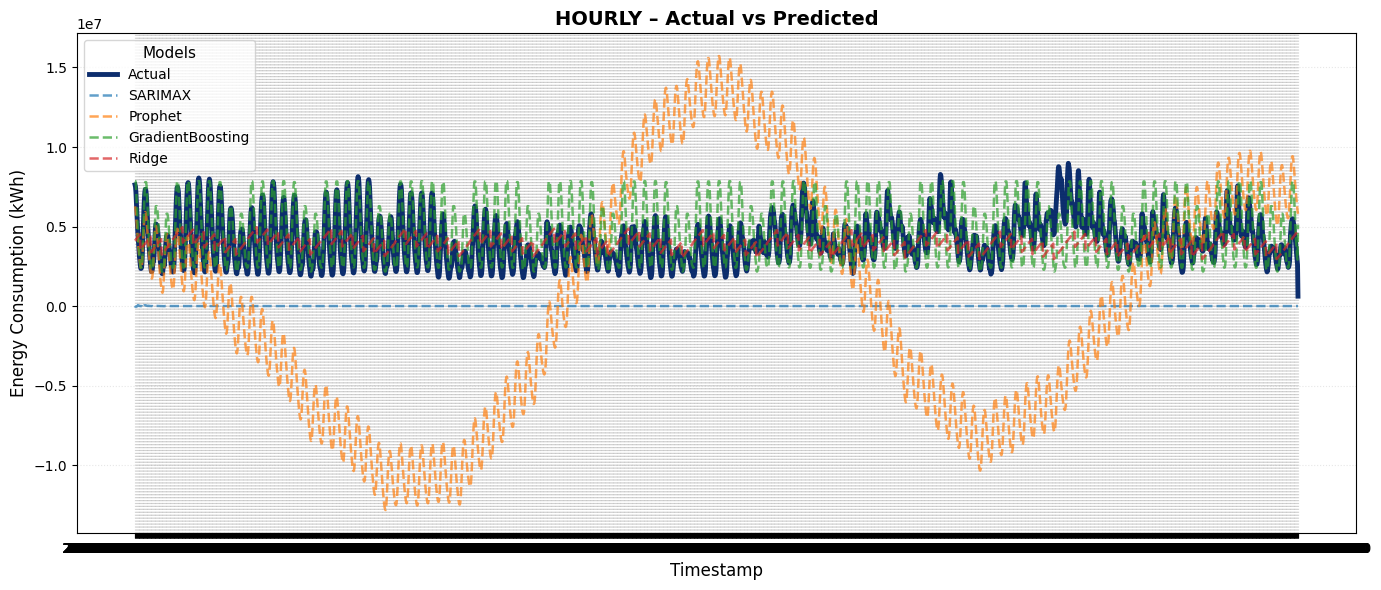


15MIN — Actual vs Predicted


y_actual  y_pred_SARIMAX  y_pred_Prophet  \
Timestamp (EST)                                                     
2018-09-13 12:15:00  1.910601e+06     1805.704736    1.895896e+06   
2018-09-13 12:30:00  1.907805e+06    -6756.690190    1.896209e+06   
2018-09-13 12:45:00  1.902780e+06    -1592.200814    1.892909e+06   
2018-09-13 13:00:00  1.898735e+06    -6527.121723    1.886172e+06   
2018-09-13 13:15:00  1.882648e+06    -2750.282558    1.876162e+06   
2018-09-13 13:30:00  1.874178e+06    -3817.747211    1.863025e+06   
2018-09-13 13:45:00  1.847740e+06    -2704.062888    1.846893e+06   
2018-09-13 14:00:00  1.831215e+06    -2052.658016    1.827880e+06   
2018-09-13 14:15:00  1.800533e+06    -6742.175773    1.806090e+06   
2018-09-13 14:30:00  1.774581e+06    -3433.650934    1.781620e+06   

                     y_pred_GradientBoosting  y_pred_Ridge  
Timestamp (EST)                                             
2018-09-13 12:15:00             1.946435e+06  1.028803e+06  
2018-09-13 12:30:00             1.950211e+06  1.028277e+06  
2018-09-13 12:45:00             1.950211e+06  1.027751e+06  
2018-09-13 13:00:00             1.946435e+06  1.038272e+06  
2018-09-13 13:15:00             1.946435e+06  1.037746e+06  
2018-09-13 13:30:00             1.950211e+06  1.037219e+06  
2018-09-13 13:45:00             1.950211e+06  1.036693e+06  
2018-09-13 14:00:00             1.908478e+06  1.047214e+06  
2018-09-13 14:15:00             1.902483e+06  1.046688e+06  
2018-09-13 14:30:00             1.891018e+06  1.046162e+06

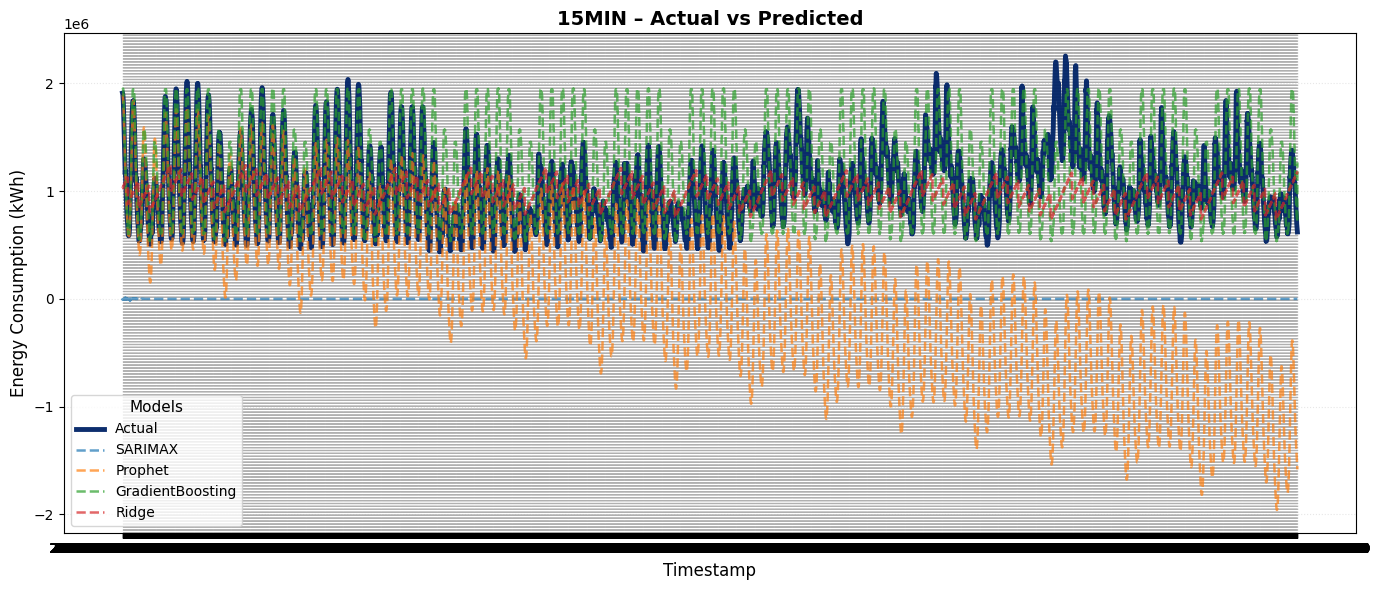

In [ ]:
# =========================
# STEP 7 — Visualizations: Heat Map • Actual vs Predicted • Feature Importance
# =========================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---- Paths (compatible with earlier steps) ----
BASE = Path("/content/analysis_outputs")
PRED_DIRS = {
    "hourly": BASE / "preds_hourly",
    "15min":  BASE / "preds_15min",
}
# fallback test split (if you want day×hour heatmaps from full test frame)
TEST_SPLIT_PATHS = {
    "hourly": Path("/content/data/test_hourly.csv"),
    "15min":  Path("/content/data/test_15min.csv"),
}
# where to save visuals
OUT_VIZ = BASE / "visuals"
(OUT_VIZ / "hourly").mkdir(parents=True, exist_ok=True)
(OUT_VIZ / "15min").mkdir(parents=True, exist_ok=True)

TARGET_COL = "baseline.out.site_energy.total.energy_consumption.kwh"
MODELS = ["SARIMAX", "Prophet", "GradientBoosting", "Ridge"]

# Try to load trained models for feature-importance (optional)
try:
    import joblib
except ImportError:
    joblib = None

MODEL_DIRS = {
    "hourly": BASE / "models_hourly",
    "15min":  BASE / "models_15min",
}

def _feature_names(gran: str):
    # Keep in sync with your Step 6 training features
    return ["hour", "day_of_week", "month"] if gran == "hourly" else \
           ["hour", "minute", "quarter", "day_of_week", "month"]

# ---------- Load helpers ----------
def _restore_dt_index_from_csv(df: pd.DataFrame) -> pd.DataFrame:
    first = df.columns[0]
    idx = pd.to_datetime(df[first], errors="coerce")
    df = df.set_index(idx).drop(columns=[first])
    return df.sort_index()

def load_actual_and_preds(gran: str):
    """Return (y_actual:Series, preds:dict[model->Series]) from Step 6 outputs."""
    base = PRED_DIRS[gran]
    y_path = base / f"y_test_{gran}.csv"
    if not y_path.exists():
        raise FileNotFoundError(f"[{gran}] Missing {y_path}. Run Step 6 first.")
    y = pd.read_csv(y_path, index_col=0).squeeze("columns")
    y.index = pd.to_datetime(y.index, errors="coerce")
    y = y.dropna().sort_index()
    y.name = "y_actual"

    preds = {}
    for m in MODELS:
        f = base / f"pred_{m}.csv"
        if f.exists():
            s = pd.read_csv(f, index_col=0).squeeze("columns")
            s.index = pd.to_datetime(s.index, errors="coerce")
            s = s.dropna().sort_index().reindex(y.index)
            preds[m] = s
    return y, preds

def load_test_df_for_heatmap(gran: str):
    """
    Prefer the full test split (with target column) to build day×hour heatmaps.
    If not available, synthesize a DataFrame from y_test_<gran>.csv.
    """
    # Try full test split (contains TARGET_COL)
    fpath = TEST_SPLIT_PATHS[gran]
    if fpath.exists():
        df = pd.read_csv(fpath)
        df = _restore_dt_index_from_csv(df)
        if TARGET_COL in df.columns:
            df = df[[TARGET_COL]].copy()
            return df
    # Fallback to y_test series
    y, _ = load_actual_and_preds(gran)
    return pd.DataFrame({TARGET_COL: y})

# ---------- Plots ----------
def plot_heatmap(gran: str, df_test: pd.DataFrame):
    outdir = OUT_VIZ / gran
    x = df_test.copy()
    x = x.dropna()
    x.index = pd.to_datetime(x.index, errors="coerce")
    x = x[x.index.notna()]

    # Make a day × hour matrix (sum over day-hour buckets)
    heat = pd.DataFrame({
        "date": x.index.date,
        "hour": x.index.hour,
        "val":  x[TARGET_COL].astype(float)
    })
    pivot = heat.pivot_table(index="date", columns="hour", values="val", aggfunc="sum")

    plt.figure(figsize=(12, 6))
    im = plt.imshow(pivot.values, aspect="auto", interpolation="nearest", cmap="viridis")
    plt.title(f"{gran.upper()} — Heat Map (kWh by day × hour)")
    plt.xlabel("Hour of Day"); plt.ylabel("Date")
    cbar = plt.colorbar(im); cbar.set_label("kWh")
    plt.xticks(ticks=np.arange(0, 24, 2), labels=[str(h) for h in range(0, 24, 2)])

    if len(pivot.index) > 1:
        yticks = np.linspace(0, len(pivot.index)-1, min(8, len(pivot.index))).astype(int)
        ylabels = pd.to_datetime(pd.Series(pivot.index[yticks])).dt.strftime("%b %d")
        plt.yticks(ticks=yticks, labels=ylabels)

    plt.tight_layout()
    plt.savefig(outdir / "heatmap_kwh_day_by_hour.png", dpi=150)
    plt.show()

def plot_actual_vs_predicted(gran: str, y: pd.Series, preds: dict, full_range=True, zoom=True):
    outdir = OUT_VIZ / gran
    color_map = {
        "SARIMAX": "#DC143C",          # crimson
        "Prophet": "#9370DB",          # purple
        "GradientBoosting": "#FF8C00", # orange
        "Ridge": "#32CD32"             # lime green
    }

    def _draw(df_plot: pd.DataFrame, suffix: str):
        plt.figure(figsize=(14, 6))
        # Actual (dark navy, stair-step)
        plt.plot(
            df_plot.index, df_plot["y_actual"],
            label="Actual (Observed)",
            color="#002366", linewidth=3.0, linestyle="-",
            alpha=0.95, drawstyle="steps-post", zorder=5
        )
        # Predictions (lighter, stair-step)
        for m, s in preds.items():
            s = s.reindex(df_plot.index)
            plt.plot(
                df_plot.index, s,
                label=f"{m} (Predicted)",
                color=color_map.get(m, "gray"),
                linewidth=1.8, linestyle="--", alpha=0.8, drawstyle="steps-post"
            )
        plt.title(f"{gran.upper()} — Actual vs Predicted ({suffix})")
        plt.xlabel("Timestamp"); plt.ylabel("Energy Consumption (kWh)")
        plt.legend(title="Series", frameon=True)
        plt.grid(alpha=0.3, linestyle=":")
        plt.tight_layout()
        plt.savefig(outdir / f"actual_vs_predicted_{suffix.replace(' ', '_').lower()}.png", dpi=150)
        plt.show()

    df_ap = pd.DataFrame({"y_actual": y})
    # Full range: only for 15min (hourly full-range is handled elsewhere as per your preference)
    if full_range:
        _draw(df_ap, "Full Range")
    # Zoom last week
    n = 168 if gran == "hourly" else 672
    sub = df_ap.tail(n) if len(df_ap) > n else df_ap
    if zoom:
        _draw(sub, "Last Week" if len(df_ap) > n else "Last Window")

def plot_feature_importance(gran: str):
    """
    GradientBoosting: feature_importances_
    Ridge: absolute standardized coefficients (if pipeline saved)
    Skips gracefully if model files not found.
    """
    outdir = OUT_VIZ / gran
    outdir.mkdir(parents=True, exist_ok=True)
    feat_names = _feature_names(gran)

    # Load models if available
    def _load_model(name):
        if joblib is None:
            return None
        mdir = MODEL_DIRS[gran]
        if not mdir.exists():
            return None
        for cand in [mdir / f"{name}.joblib", mdir / f"model_{name}.joblib", mdir / f"{name.lower()}.joblib"]:
            if cand.exists():
                try:
                    return joblib.load(cand)
                except Exception:
                    pass
        return None

    # GBR
    gbr = _load_model("GradientBoosting")
    if gbr is not None:
        try:
            importances = getattr(gbr, "feature_importances_", None)
            # If pipeline, last step
            if importances is None and hasattr(gbr, "steps"):
                importances = getattr(gbr.steps[-1][1], "feature_importances_", None)
            if importances is not None and len(importances) == len(feat_names):
                s = pd.Series(importances, index=feat_names, dtype=float).sort_values()
                plt.figure(figsize=(7, 4.5))
                s.plot(kind="barh")
                plt.title(f"{gran.upper()} — Gradient Boosting Feature Importance")
                plt.xlabel("Importance (gain)")
                plt.tight_layout()
                plt.savefig(outdir / "feature_importance_gbr.png", dpi=150)
                plt.show()
                s.rename("importance").to_csv(outdir / "feature_importance_gbr.csv")
            else:
                print(f"ℹ️ [{gran}] GBR importance unavailable (shape mismatch or missing).")
        except Exception as e:
            print(f"⚠️ [{gran}] GBR importance failed: {e}")
    else:
        print(f"ℹ️ [{gran}] GBR model file not found — skipping importance.")

    # Ridge
    ridge = _load_model("Ridge")
    if ridge is not None:
        try:
            coefs = None
            if hasattr(ridge, "steps"):  # pipeline
                coefs = getattr(ridge.steps[-1][1], "coef_", None)
            else:
                coefs = getattr(ridge, "coef_", None)
            if coefs is not None:
                coefs = np.ravel(coefs)
                if len(coefs) == len(feat_names):
                    s = pd.Series(np.abs(coefs), index=feat_names, dtype=float).sort_values()
                    plt.figure(figsize=(7, 4.5))
                    s.plot(kind="barh")
                    plt.title(f"{gran.upper()} — Ridge Coefficient Magnitudes (std-scaled)")
                    plt.xlabel("|Coefficient|")
                    plt.tight_layout()
                    plt.savefig(outdir / "feature_importance_ridge.png", dpi=150)
                    plt.show()
                    s.rename("coef_abs").to_csv(outdir / "feature_importance_ridge.csv")
                else:
                    print(f"ℹ️ [{gran}] Ridge coef length != feature count; skipping.")
            else:
                print(f"ℹ️ [{gran}] Ridge has no coef_.")
        except Exception as e:
            print(f"⚠️ [{gran}] Ridge importance failed: {e}")
    else:
        print(f"ℹ️ [{gran}] Ridge model file not found — skipping importance.")

# ---------- Run (both granularities) ----------
for gran in ["hourly", "15min"]:
    print(f"\n==============================\n{gran.upper()} — VISUALS\n==============================")

    # 1) Heat map (kWh by day × hour)
    df_test = load_test_df_for_heatmap(gran)
    plot_heatmap(gran, df_test)

    # 2) Actual vs Predicted — stair-step lines (Actual dark blue)
    y_true, preds = load_actual_and_preds(gran)
    # For 15-min: show full range + zoom; For hourly: only zoom (full range is already elsewhere)
    plot_actual_vs_predicted(
        gran,
        y_true,
        preds,
        full_range=(gran == "15min"),
        zoom=True
    )

    # 3) Feature importance (GBR & Ridge if model files exist)
    plot_feature_importance(gran)

print(f"\n✅ Step 7 visuals saved under: {OUT_VIZ}/<hourly|15min>")



HOURLY — Actual vs Predicted


y_actual  y_pred_SARIMAX  y_pred_Prophet  \
Timestamp (EST)                                                     
2018-09-13 12:00:00  7.620508e+06  -105107.927027    6.267466e+06   
2018-09-13 13:00:00  7.503301e+06   -43936.290590    6.119680e+06   
2018-09-13 14:00:00  7.152833e+06   -30413.950088    5.835571e+06   
2018-09-13 15:00:00  6.549971e+06   -28085.179399    5.446260e+06   
2018-09-13 16:00:00  5.921634e+06   -25508.961303    5.012200e+06   
2018-09-13 17:00:00  5.264293e+06    10887.138124    4.594511e+06   
2018-09-13 18:00:00  4.749105e+06     7739.452249    4.223054e+06   
2018-09-13 19:00:00  4.329258e+06    61374.852331    3.889863e+06   
2018-09-13 20:00:00  3.816359e+06    14198.013759    3.571926e+06   
2018-09-13 21:00:00  3.399387e+06     8833.707857    3.260052e+06   

                     y_pred_GradientBoosting  y_pred_Ridge  
Timestamp (EST)                                             
2018-09-13 12:00:00             7.851685e+06  4.113992e+06  
2018-09-13 13:00:00             7.851685e+06  4.149802e+06  
2018-09-13 14:00:00             7.595747e+06  4.185613e+06  
2018-09-13 15:00:00             7.057157e+06  4.221423e+06  
2018-09-13 16:00:00             6.382432e+06  4.257233e+06  
2018-09-13 17:00:00             5.711063e+06  4.293044e+06  
2018-09-13 18:00:00             4.974855e+06  4.328854e+06  
2018-09-13 19:00:00             4.505835e+06  4.364665e+06  
2018-09-13 20:00:00             4.018580e+06  4.400475e+06  
2018-09-13 21:00:00             3.596904e+06  4.436285e+06


📊 Performance Summary:


Model         MAE        RMSE  MAPE (%)
0  GradientBoosting  1002167.19  1307373.38     24.03
1             Ridge  1163369.23  1464722.64     30.46
2           SARIMAX  4164432.67  4417141.51    100.00
3           Prophet  7136642.47  8434314.80    194.87

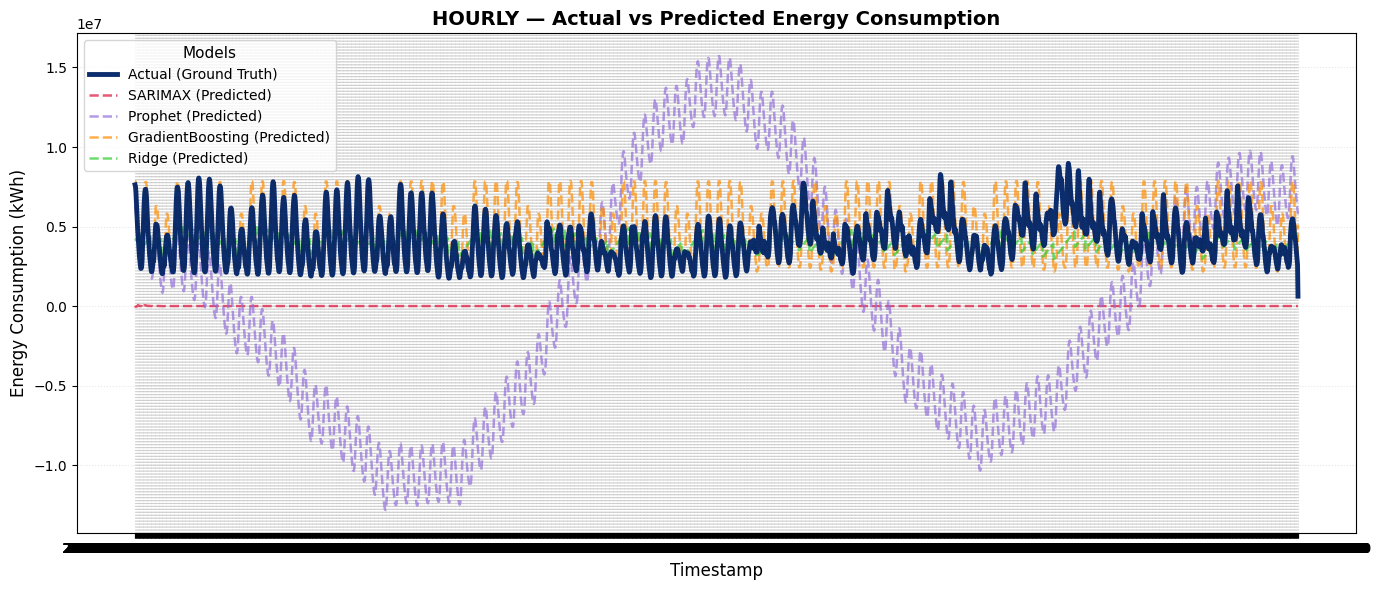

🧠 Insights for HOURLY:
• 🏆 Best overall model by RMSE: **GradientBoosting**
• Average MAE across models: 3,366,652.89
• The closer predicted lines follow the dark blue Actual, the more reliable the model.
• Larger deviations indicate where models struggle (e.g., peaks or dips).
• Use RMSE for overall fit, MAPE for percentage accuracy.


15MIN — Actual vs Predicted


y_actual  y_pred_SARIMAX  y_pred_Prophet  \
Timestamp (EST)                                                     
2018-09-13 12:15:00  1.910601e+06     1805.704736    1.895896e+06   
2018-09-13 12:30:00  1.907805e+06    -6756.690190    1.896209e+06   
2018-09-13 12:45:00  1.902780e+06    -1592.200814    1.892909e+06   
2018-09-13 13:00:00  1.898735e+06    -6527.121723    1.886172e+06   
2018-09-13 13:15:00  1.882648e+06    -2750.282558    1.876162e+06   
2018-09-13 13:30:00  1.874178e+06    -3817.747211    1.863025e+06   
2018-09-13 13:45:00  1.847740e+06    -2704.062888    1.846893e+06   
2018-09-13 14:00:00  1.831215e+06    -2052.658016    1.827880e+06   
2018-09-13 14:15:00  1.800533e+06    -6742.175773    1.806090e+06   
2018-09-13 14:30:00  1.774581e+06    -3433.650934    1.781620e+06   

                     y_pred_GradientBoosting  y_pred_Ridge  
Timestamp (EST)                                             
2018-09-13 12:15:00             1.946435e+06  1.028803e+06  
2018-09-13 12:30:00             1.950211e+06  1.028277e+06  
2018-09-13 12:45:00             1.950211e+06  1.027751e+06  
2018-09-13 13:00:00             1.946435e+06  1.038272e+06  
2018-09-13 13:15:00             1.946435e+06  1.037746e+06  
2018-09-13 13:30:00             1.950211e+06  1.037219e+06  
2018-09-13 13:45:00             1.950211e+06  1.036693e+06  
2018-09-13 14:00:00             1.908478e+06  1.047214e+06  
2018-09-13 14:15:00             1.902483e+06  1.046688e+06  
2018-09-13 14:30:00             1.891018e+06  1.046162e+06


📊 Performance Summary:


Model         MAE        RMSE  MAPE (%)
0  GradientBoosting   251002.64   325454.55     24.03
1             Ridge   291589.71   366887.09     30.40
2           SARIMAX  1041323.45  1104769.99    100.00
3           Prophet  1080517.14  1312629.46    113.35

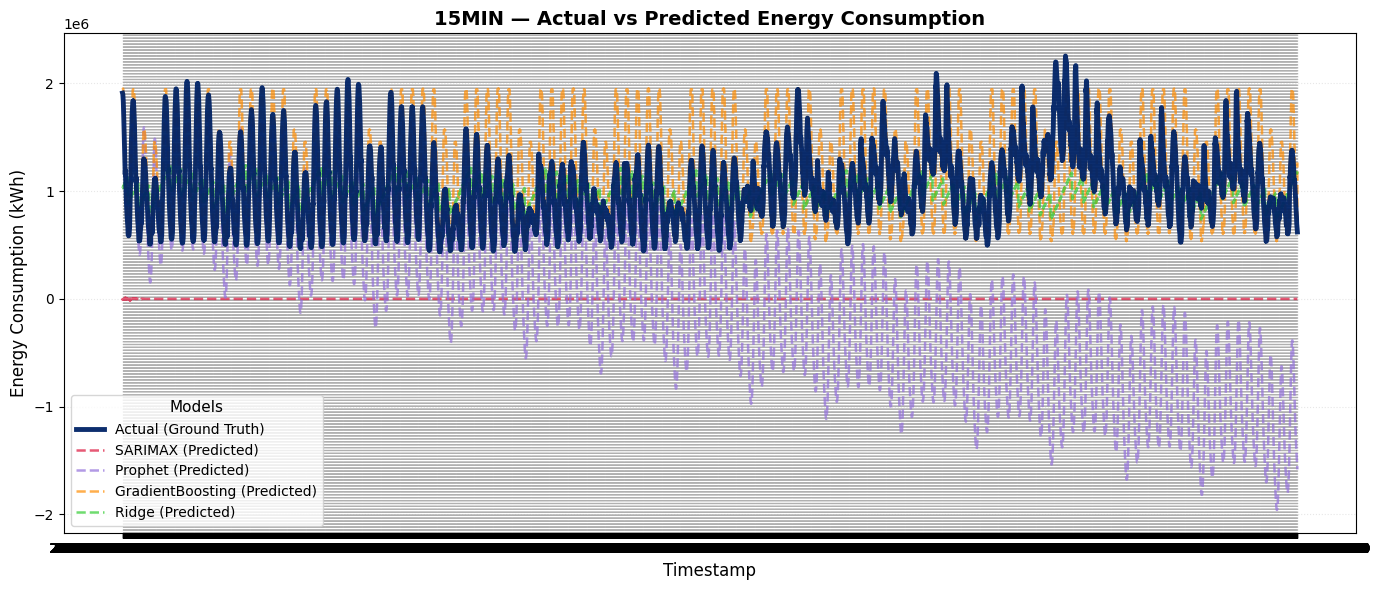

🧠 Insights for 15MIN:
• 🏆 Best overall model by RMSE: **GradientBoosting**
• Average MAE across models: 666,108.23
• The closer predicted lines follow the dark blue Actual, the more reliable the model.
• Larger deviations indicate where models struggle (e.g., peaks or dips).
• Use RMSE for overall fit, MAPE for percentage accuracy.



In [ ]:
# =========================
# STEP 7 — Compare Actual vs Predicted (Enhanced & Descriptive)
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Directories where Step 6 saved predictions
BASE = Path("/content/analysis_outputs")
pred_paths = {
    "hourly": BASE / "preds_hourly",
    "15min":  BASE / "preds_15min"
}

def evaluate_metrics(y_true, y_pred):
    """Compute key error metrics."""
    mae  = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred)**2))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return round(mae, 2), round(rmse, 2), round(mape, 2)

def show_side_by_side(gran):
    print(f"\n==============================\n{gran.upper()} — Actual vs Predicted\n==============================")
    p = pred_paths[gran]

    # ---- Load actuals ----
    y_true = pd.read_csv(p / f"y_test_{gran}.csv", index_col=0)
    y_true.columns = ["y_actual"]

    # ---- Load predictions ----
    preds = []
    for model in ["SARIMAX", "Prophet", "GradientBoosting", "Ridge"]:
        f = p / f"pred_{model}.csv"
        if f.exists():
            df = pd.read_csv(f, index_col=0)
            df.columns = [f"y_pred_{model}"]
            preds.append(df)
    merged = y_true.copy()
    for df in preds:
        merged = merged.join(df, how="left")

    # show top few rows
    display(merged.head(10))

    # ---- Metrics table ----
    metrics_summary = []
    for col in merged.columns[1:]:
        model_name = col.replace("y_pred_", "")
        mae, rmse, mape = evaluate_metrics(merged["y_actual"], merged[col])
        metrics_summary.append({
            "Model": model_name,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE (%)": mape
        })
    metrics_df = pd.DataFrame(metrics_summary).sort_values("RMSE").reset_index(drop=True)

    print("\n📊 Performance Summary:")
    display(metrics_df)

    # ---- Visualization ----
    plt.figure(figsize=(14, 6))

    # Actual (dark, bold)
    plt.plot(
        merged.index,
        merged["y_actual"],
        label="Actual (Ground Truth)",
        color="#002366",  # dark royal blue
        linewidth=3.5,
        linestyle="-",
        alpha=0.95,
        zorder=5
    )

    # Predicted (lighter, dashed)
    color_map = {
        "SARIMAX": "#DC143C",         # crimson
        "Prophet": "#9370DB",         # purple
        "GradientBoosting": "#FF8C00",# orange
        "Ridge": "#32CD32"            # lime green
    }

    for col in merged.columns[1:]:
        model = col.replace("y_pred_", "")
        plt.plot(
            merged.index,
            merged[col],
            label=f"{model} (Predicted)",
            color=color_map.get(model, "gray"),
            linewidth=1.8,
            linestyle="--",
            alpha=0.7
        )

    plt.title(f"{gran.upper()} — Actual vs Predicted Energy Consumption", fontsize=14, fontweight="bold")
    plt.xlabel("Timestamp", fontsize=12)
    plt.ylabel("Energy Consumption (kWh)", fontsize=12)
    plt.legend(title="Models", fontsize=10, title_fontsize=11, loc="best", frameon=True)
    plt.grid(alpha=0.3, linestyle=":")
    plt.tight_layout()
    plt.show()

    # ---- Summary interpretation ----
    print(f"🧠 Insights for {gran.upper()}:")
    best_model = metrics_df.loc[0, 'Model']
    print(f"• 🏆 Best overall model by RMSE: **{best_model}**")
    print(f"• Average MAE across models: {metrics_df['MAE'].mean():,.2f}")
    print(f"• The closer predicted lines follow the dark blue Actual, the more reliable the model.")
    print("• Larger deviations indicate where models struggle (e.g., peaks or dips).")
    print("• Use RMSE for overall fit, MAPE for percentage accuracy.\n")

# Run for both granularities
show_side_by_side("hourly")
show_side_by_side("15min")



HOURLY — Evaluation


Model           MAE          RMSE        MAPE
2  GradientBoosting  1.002167e+06  1.307373e+06   24.031343
3             Ridge  1.163369e+06  1.464723e+06   30.464181
0           SARIMAX  4.164433e+06  4.417142e+06  100.000681
1           Prophet  7.136642e+06  8.434315e+06  194.872572

💾 Metrics saved to /content/analysis_outputs/preds_hourly/evaluation_metrics.csv

📊 Feature Importance (hourly) — Gradient Boosting


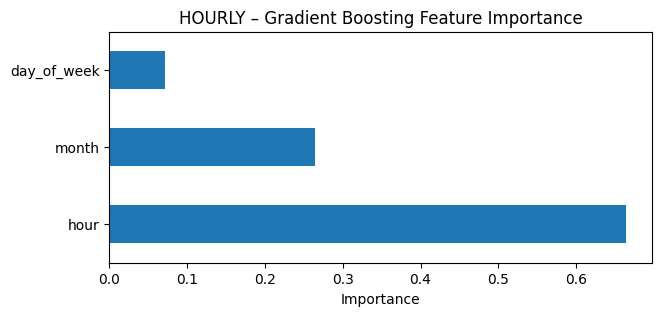


15MIN — Evaluation


Model           MAE          RMSE        MAPE
2  GradientBoosting  2.510026e+05  3.254546e+05   24.026772
3             Ridge  2.915897e+05  3.668871e+05   30.400451
0           SARIMAX  1.041323e+06  1.104770e+06  100.000077
1           Prophet  1.080517e+06  1.312629e+06  113.350148

💾 Metrics saved to /content/analysis_outputs/preds_15min/evaluation_metrics.csv

📊 Feature Importance (15min) — Gradient Boosting


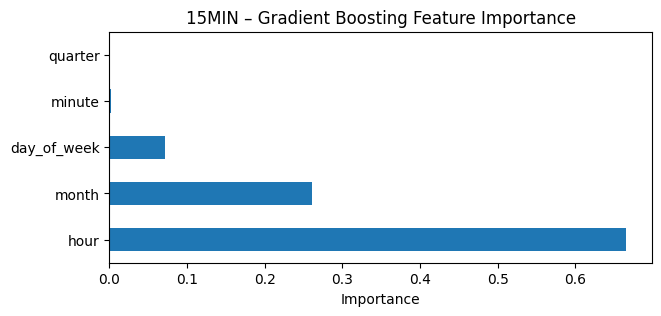

In [ ]:
# =========================
# STEP 8 — Evaluation Metrics + Feature Importance
# =========================
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error

MODEL_DIR = Path("/content/models")

def evaluate_predictions(gran):
    print(f"\n==============================\n{gran.upper()} — Evaluation\n==============================")
    p = pred_paths[gran]
    y_true = pd.read_csv(p / f"y_test_{gran}.csv", index_col=0).iloc[:,0]

    results = []
    for model in ["SARIMAX", "Prophet", "GradientBoosting", "Ridge"]:
        f = p / f"pred_{model}.csv"
        if not f.exists():
            continue
        y_pred = pd.read_csv(f, index_col=0).iloc[:,0]
        mae  = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
        results.append({"Model": model, "MAE": mae, "RMSE": rmse, "MAPE": mape})

    score_df = pd.DataFrame(results).sort_values("RMSE")
    display(score_df)
    score_df.to_csv(p / "evaluation_metrics.csv", index=False)
    print(f"💾 Metrics saved to {p}/evaluation_metrics.csv")

    # === Feature importance (GBR only) ===
    gbr_path = MODEL_DIR / gran / "gbr.joblib"
    if gbr_path.exists():
        print(f"\n📊 Feature Importance ({gran}) — Gradient Boosting")
        bundle = joblib.load(gbr_path)
        gbr = bundle["model"]; features = bundle["features"]
        importances = pd.Series(gbr.feature_importances_, index=features)
        importances.sort_values(ascending=False).plot(kind="barh", figsize=(7,3))
        plt.title(f"{gran.upper()} – Gradient Boosting Feature Importance")
        plt.xlabel("Importance")
        plt.show()

# Evaluate both granularities
evaluate_predictions("hourly")
evaluate_predictions("15min")



HOURLY — Evaluation (MAE / RMSE / MAPE)


y_actual  y_pred_SARIMAX  y_pred_Prophet  \
Timestamp (EST)                                                     
2018-09-13 12:00:00  7.620508e+06  -105107.927027    6.267466e+06   
2018-09-13 13:00:00  7.503301e+06   -43936.290590    6.119680e+06   
2018-09-13 14:00:00  7.152833e+06   -30413.950088    5.835571e+06   
2018-09-13 15:00:00  6.549971e+06   -28085.179399    5.446260e+06   
2018-09-13 16:00:00  5.921634e+06   -25508.961303    5.012200e+06   
2018-09-13 17:00:00  5.264293e+06    10887.138124    4.594511e+06   
2018-09-13 18:00:00  4.749105e+06     7739.452249    4.223054e+06   
2018-09-13 19:00:00  4.329258e+06    61374.852331    3.889863e+06   
2018-09-13 20:00:00  3.816359e+06    14198.013759    3.571926e+06   
2018-09-13 21:00:00  3.399387e+06     8833.707857    3.260052e+06   

                     y_pred_GradientBoosting  y_pred_Ridge  
Timestamp (EST)                                             
2018-09-13 12:00:00             7.851685e+06  4.113992e+06  
2018-09-13 13:00:00             7.851685e+06  4.149802e+06  
2018-09-13 14:00:00             7.595747e+06  4.185613e+06  
2018-09-13 15:00:00             7.057157e+06  4.221423e+06  
2018-09-13 16:00:00             6.382432e+06  4.257233e+06  
2018-09-13 17:00:00             5.711063e+06  4.293044e+06  
2018-09-13 18:00:00             4.974855e+06  4.328854e+06  
2018-09-13 19:00:00             4.505835e+06  4.364665e+06  
2018-09-13 20:00:00             4.018580e+06  4.400475e+06  
2018-09-13 21:00:00             3.596904e+06  4.436285e+06


📊 Performance Summary:


Model           MAE          RMSE    MAPE (%)
0  GradientBoosting  1.002167e+06  1.307373e+06   24.031343
1             Ridge  1.163369e+06  1.464723e+06   30.464181
2           SARIMAX  4.164433e+06  4.417142e+06  100.000681
3           Prophet  7.136642e+06  8.434315e+06  194.872572

💾 Saved metrics to /content/analysis_outputs/evaluation/hourly/evaluation_metrics.csv
💾 Saved side-by-side table to /content/analysis_outputs/evaluation/hourly/actual_and_predictions.csv


<Figure size 800x400 with 0 Axes>

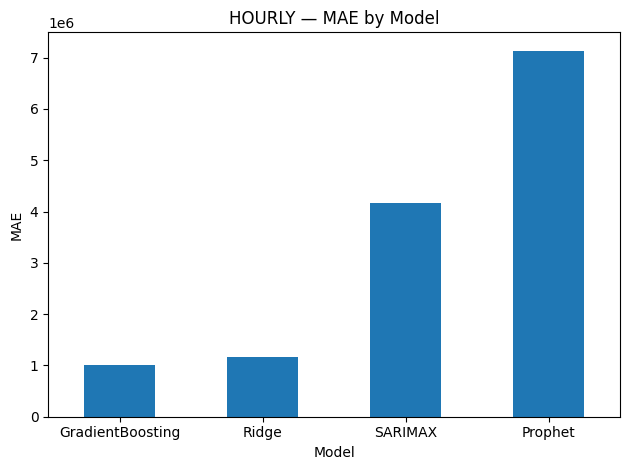

<Figure size 800x400 with 0 Axes>

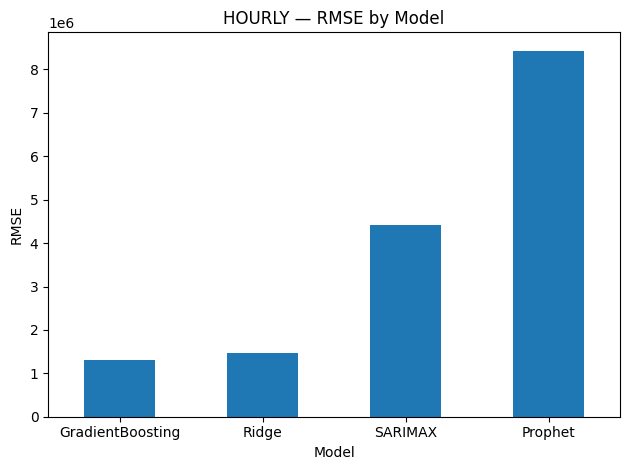

<Figure size 800x400 with 0 Axes>

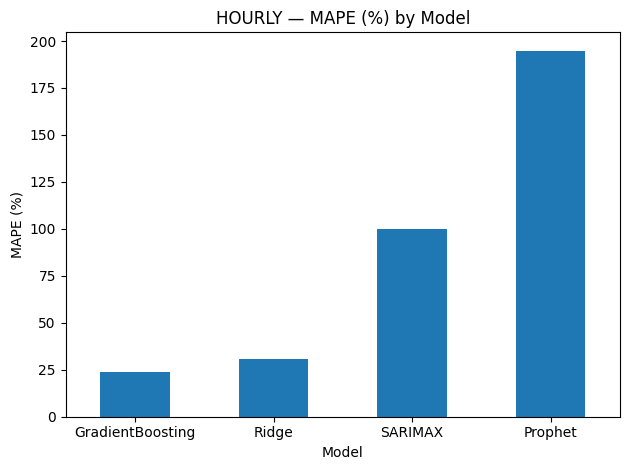

🧠 Insights (HOURLY):
• 🏆 Best overall (by RMSE): GradientBoosting (MAE=1002167, RMSE=1307373, MAPE=24.03%)
• Use RMSE for overall fit; MAPE for relative percentage error (be cautious when actuals ≈ 0).
• Compare these with Step 7 plots — the closer a model track is to the dark blue Actual, the better.


15MIN — Evaluation (MAE / RMSE / MAPE)


y_actual  y_pred_SARIMAX  y_pred_Prophet  \
Timestamp (EST)                                                     
2018-09-13 12:15:00  1.910601e+06     1805.704736    1.895896e+06   
2018-09-13 12:30:00  1.907805e+06    -6756.690190    1.896209e+06   
2018-09-13 12:45:00  1.902780e+06    -1592.200814    1.892909e+06   
2018-09-13 13:00:00  1.898735e+06    -6527.121723    1.886172e+06   
2018-09-13 13:15:00  1.882648e+06    -2750.282558    1.876162e+06   
2018-09-13 13:30:00  1.874178e+06    -3817.747211    1.863025e+06   
2018-09-13 13:45:00  1.847740e+06    -2704.062888    1.846893e+06   
2018-09-13 14:00:00  1.831215e+06    -2052.658016    1.827880e+06   
2018-09-13 14:15:00  1.800533e+06    -6742.175773    1.806090e+06   
2018-09-13 14:30:00  1.774581e+06    -3433.650934    1.781620e+06   

                     y_pred_GradientBoosting  y_pred_Ridge  
Timestamp (EST)                                             
2018-09-13 12:15:00             1.946435e+06  1.028803e+06  
2018-09-13 12:30:00             1.950211e+06  1.028277e+06  
2018-09-13 12:45:00             1.950211e+06  1.027751e+06  
2018-09-13 13:00:00             1.946435e+06  1.038272e+06  
2018-09-13 13:15:00             1.946435e+06  1.037746e+06  
2018-09-13 13:30:00             1.950211e+06  1.037219e+06  
2018-09-13 13:45:00             1.950211e+06  1.036693e+06  
2018-09-13 14:00:00             1.908478e+06  1.047214e+06  
2018-09-13 14:15:00             1.902483e+06  1.046688e+06  
2018-09-13 14:30:00             1.891018e+06  1.046162e+06


📊 Performance Summary:


Model           MAE          RMSE    MAPE (%)
0  GradientBoosting  2.510026e+05  3.254546e+05   24.026772
1             Ridge  2.915897e+05  3.668871e+05   30.400451
2           SARIMAX  1.041323e+06  1.104770e+06  100.000077
3           Prophet  1.080517e+06  1.312629e+06  113.350148

💾 Saved metrics to /content/analysis_outputs/evaluation/15min/evaluation_metrics.csv
💾 Saved side-by-side table to /content/analysis_outputs/evaluation/15min/actual_and_predictions.csv


<Figure size 800x400 with 0 Axes>

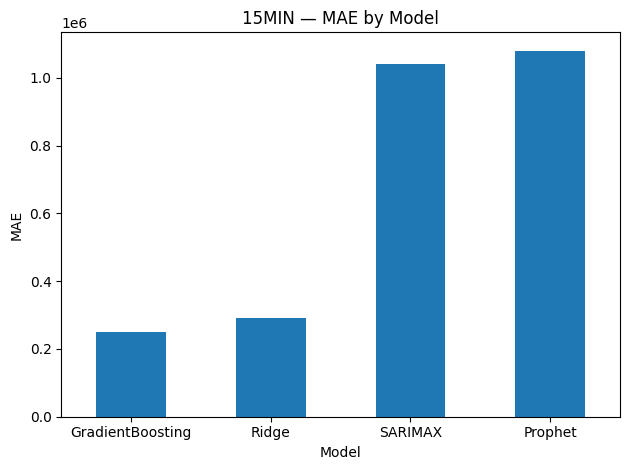

<Figure size 800x400 with 0 Axes>

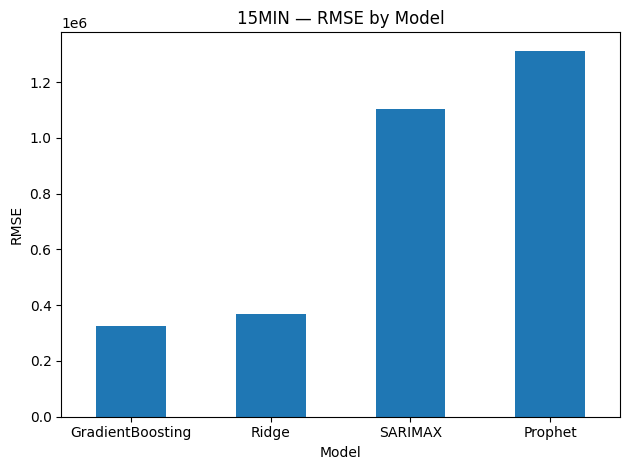

<Figure size 800x400 with 0 Axes>

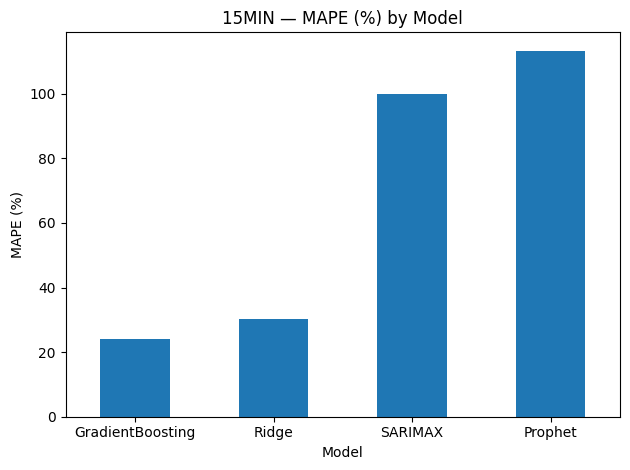

🧠 Insights (15MIN):
• 🏆 Best overall (by RMSE): GradientBoosting (MAE=251003, RMSE=325455, MAPE=24.03%)
• Use RMSE for overall fit; MAPE for relative percentage error (be cautious when actuals ≈ 0).
• Compare these with Step 7 plots — the closer a model track is to the dark blue Actual, the better.

📚 Combined metrics saved to: /content/analysis_outputs/evaluation/combined_metrics.csv


In [ ]:
# =========================
# STEP 8 — Evaluation (MAE, RMSE, MAPE) + Descriptive Summary
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Locations where Step 6 saved truth & predictions
BASE = Path("/content/analysis_outputs")
PRED_DIRS = {
    "hourly": BASE / "preds_hourly",
    "15min":  BASE / "preds_15min",
}

# Where to save Step 8 evaluation artifacts
OUT_EVAL = BASE / "evaluation"
OUT_EVAL.mkdir(parents=True, exist_ok=True)

TARGET_LABEL = "y_actual"
MODELS = ["SARIMAX", "Prophet", "GradientBoosting", "Ridge"]

def _load_truth_preds(gran: str):
    """Load y_test and any available predictions for a granularity."""
    pdir = PRED_DIRS[gran]
    y_path = pdir / f"y_test_{gran}.csv"
    if not y_path.exists():
        raise FileNotFoundError(f"[{gran}] y_test not found at {y_path}. Run Step 6 first.")
    y_true = pd.read_csv(y_path, index_col=0).iloc[:, 0].rename(TARGET_LABEL)

    preds = {}
    for m in MODELS:
        f = pdir / f"pred_{m}.csv"
        if f.exists():
            s = pd.read_csv(f, index_col=0).iloc[:, 0]
            s.name = f"y_pred_{m}"
            # align to y_true index just in case
            preds[m] = s.reindex(y_true.index)
    return y_true, preds

def _metrics(y_true: pd.Series, y_pred: pd.Series):
    """Return MAE, RMSE, MAPE (float)."""
    yt = y_true.astype(float).values
    yp = y_pred.astype(float).values
    mae  = float(np.mean(np.abs(yt - yp)))
    rmse = float(np.sqrt(np.mean((yt - yp) ** 2)))
    mape = float(np.mean(np.abs((yt - yp) / (yt + 1e-8))) * 100)
    return mae, rmse, mape

def _evaluate_one(gran: str):
    print(f"\n==============================\n{gran.upper()} — Evaluation (MAE / RMSE / MAPE)\n==============================")
    out_dir = OUT_EVAL / gran
    out_dir.mkdir(parents=True, exist_ok=True)

    # ---- Load
    y_true, preds = _load_truth_preds(gran)

    # ---- Build a single comparison frame (Actual + Preds)
    comp = pd.DataFrame({TARGET_LABEL: y_true})
    for m, s in preds.items():
        comp[f"y_pred_{m}"] = s
    # quick preview
    display(comp.head(10))

    # ---- Compute metrics per model
    rows = []
    for m in MODELS:
        col = f"y_pred_{m}"
        if col in comp.columns:
            mae, rmse, mape = _metrics(comp[TARGET_LABEL], comp[col])
            rows.append({"Model": m, "MAE": mae, "RMSE": rmse, "MAPE (%)": mape})
    if not rows:
        print(f"ℹ️ No predictions found for {gran}. Make sure Step 6 generated pred_*.csv files.")
        return pd.DataFrame()

    score = pd.DataFrame(rows).sort_values("RMSE").reset_index(drop=True)
    print("\n📊 Performance Summary:")
    display(score)

    # ---- Save metrics & comparison table
    score.to_csv(out_dir / "evaluation_metrics.csv", index=False)
    comp.to_csv(out_dir / "actual_and_predictions.csv")
    print(f"💾 Saved metrics to {out_dir/'evaluation_metrics.csv'}")
    print(f"💾 Saved side-by-side table to {out_dir/'actual_and_predictions.csv'}")

    # ---- Bar charts: MAE / RMSE / MAPE
    for metric in ["MAE", "RMSE", "MAPE (%)"]:
        plt.figure(figsize=(8, 4))
        score.plot(x="Model", y=metric, kind="bar", legend=False)
        plt.title(f"{gran.upper()} — {metric} by Model")
        plt.ylabel(metric)
        plt.xlabel("Model")
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.savefig(out_dir / f"bar_{metric.replace(' ', '_').replace('(', '').replace(')', '')}.png", dpi=140)
        plt.show()

    # ---- Brief textual insights
    best = score.iloc[0]
    print(f"🧠 Insights ({gran.upper()}):")
    print(f"• 🏆 Best overall (by RMSE): {best['Model']} "
          f"(MAE={best['MAE']:.0f}, RMSE={best['RMSE']:.0f}, MAPE={best['MAPE (%)']:.2f}%)")
    print("• Use RMSE for overall fit; MAPE for relative percentage error (be cautious when actuals ≈ 0).")
    print("• Compare these with Step 7 plots — the closer a model track is to the dark blue Actual, the better.\n")

    return score

# ---- Run evaluation for both granularities
score_hourly = _evaluate_one("hourly")
score_15min  = _evaluate_one("15min")

# ---- Combined table (if both available)
if not score_hourly.empty or not score_15min.empty:
    for s, g in [(score_hourly, "Hourly"), (score_15min, "15-min")]:
        if not s.empty:
            s["Granularity"] = g
    combined = pd.concat([df for df in [score_hourly, score_15min] if not df.empty], ignore_index=True)
    combined_path = OUT_EVAL / "combined_metrics.csv"
    combined.to_csv(combined_path, index=False)
    print(f"📚 Combined metrics saved to: {combined_path}")



HOURLY — VARIATION & BACKTEST


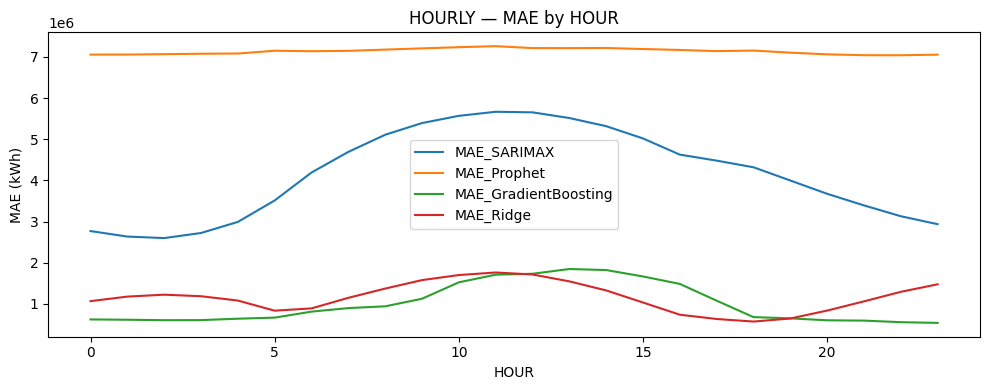

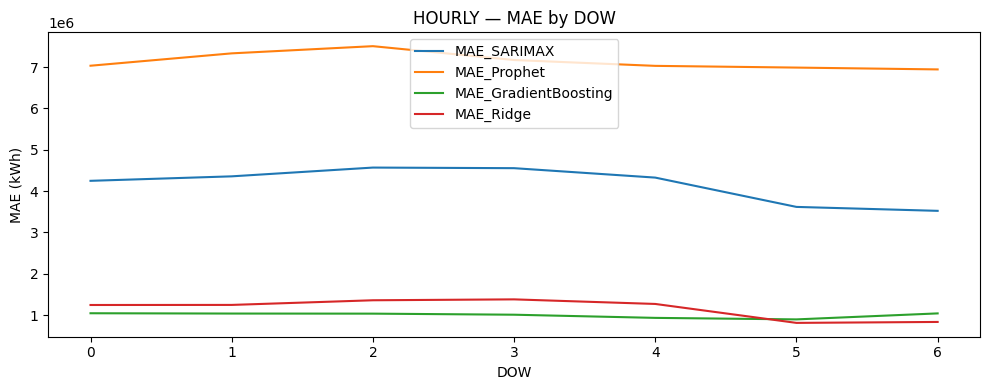

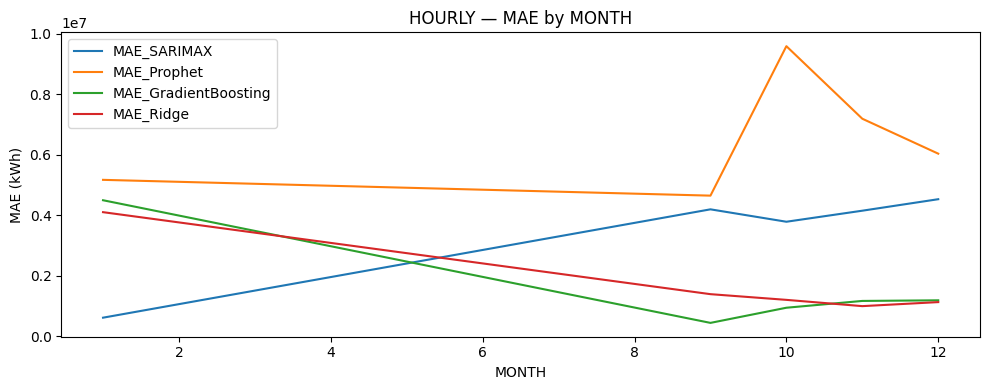


⚡ HOURLY — Peak vs Off-Peak error


Model    Period           MAE          RMSE
0           SARIMAX  Off-Peak  4.191780e+06  4.493056e+06
1           SARIMAX      Peak  4.082845e+06  4.182483e+06
2           Prophet  Off-Peak  7.144630e+06  8.437339e+06
3           Prophet      Peak  7.112813e+06  8.425285e+06
4  GradientBoosting  Off-Peak  1.053527e+06  1.379833e+06
5  GradientBoosting      Peak  8.489433e+05  1.062227e+06
6             Ridge  Off-Peak  1.302274e+06  1.599386e+06
7             Ridge      Peak  7.489688e+05  9.562543e+05

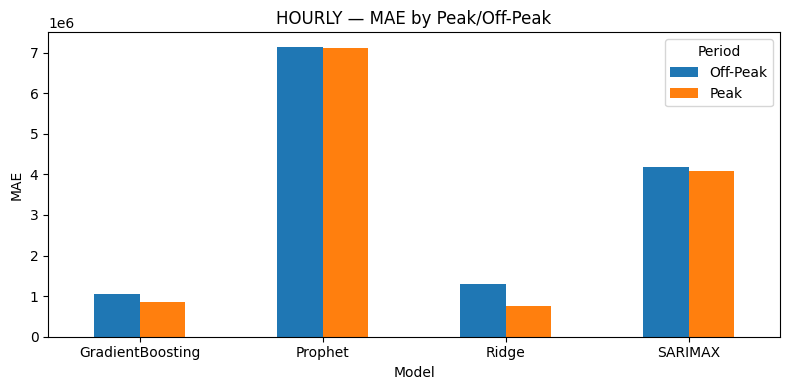

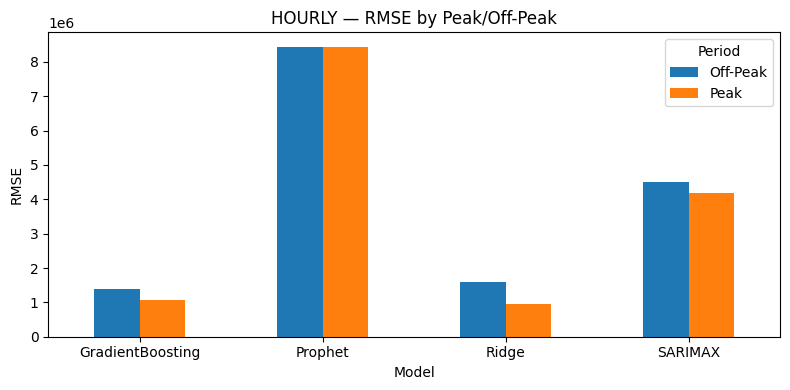

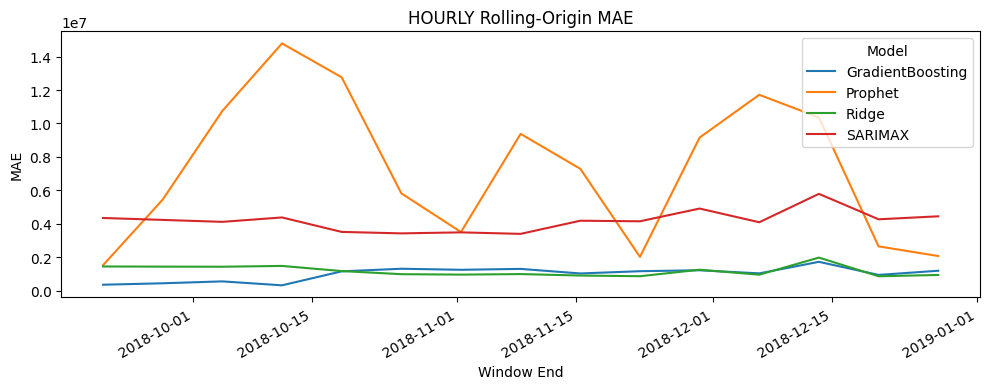

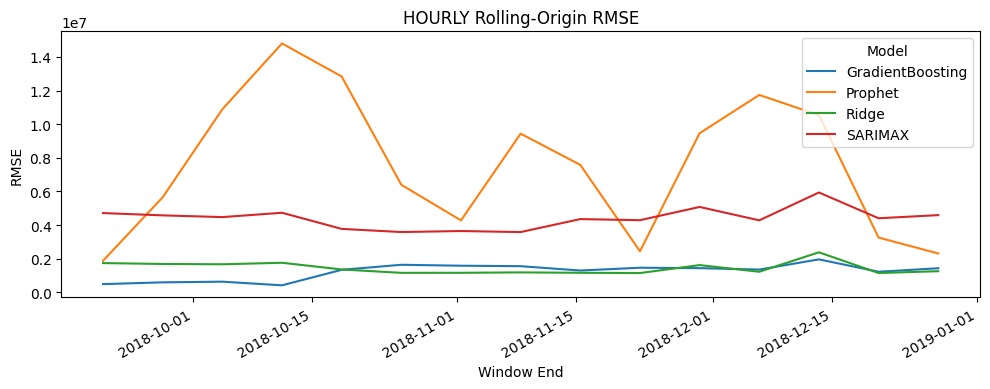

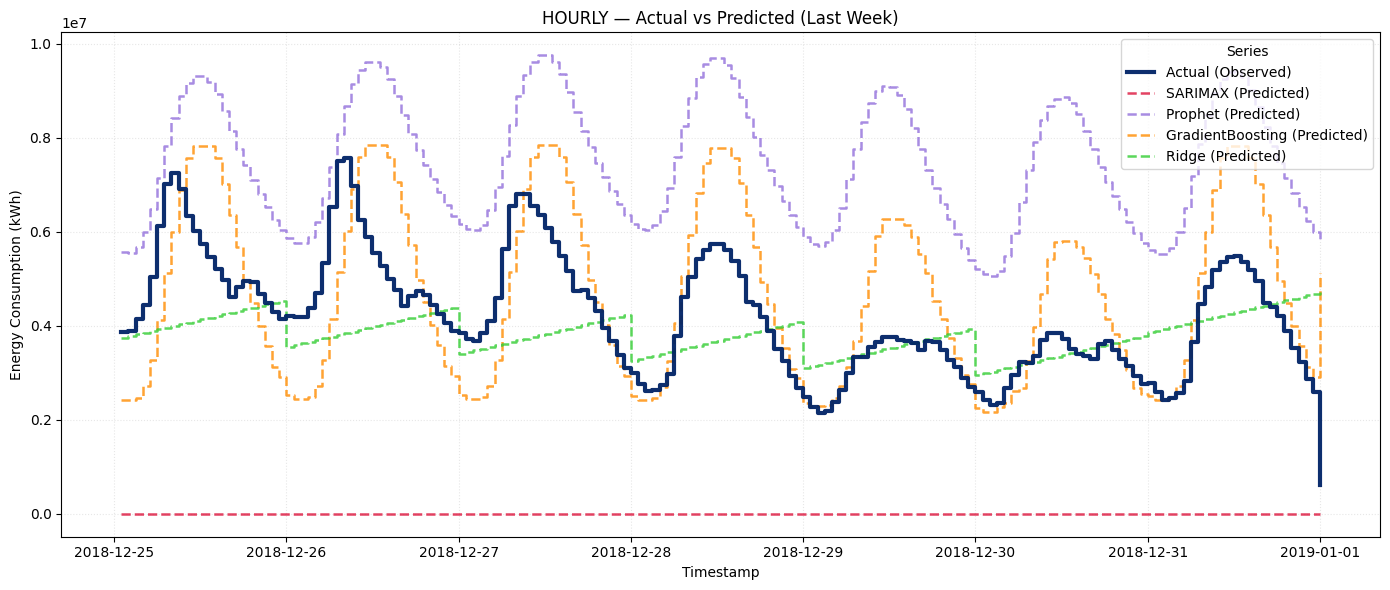


15MIN — VARIATION & BACKTEST


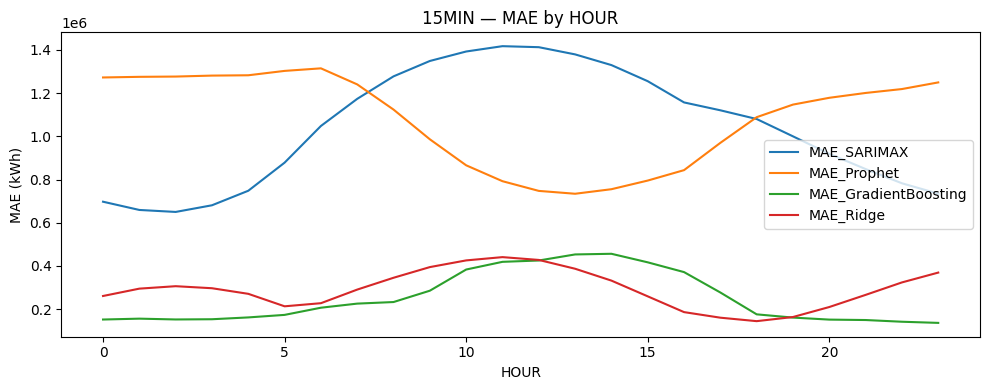

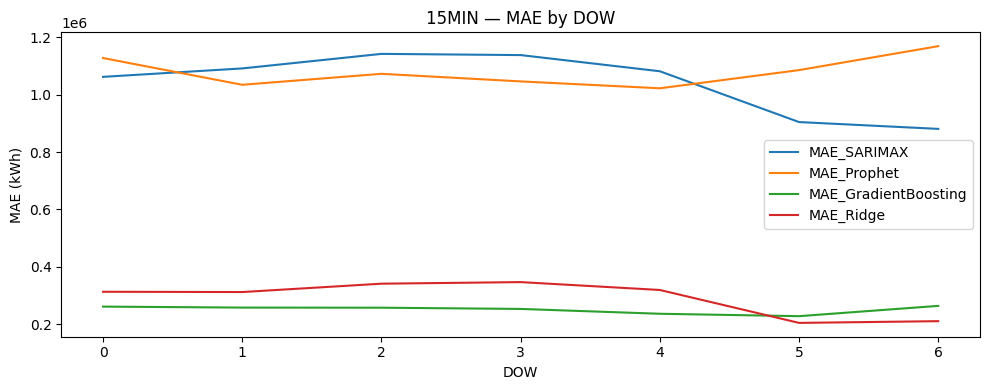

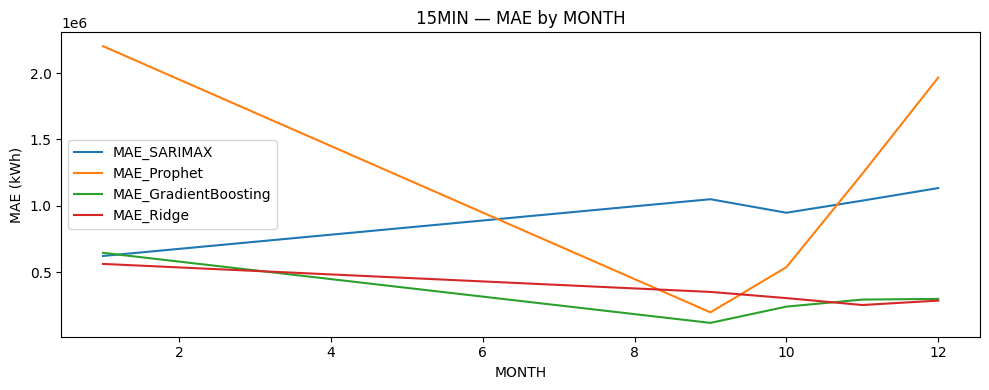


⚡ 15MIN — Peak vs Off-Peak error


Model    Period           MAE          RMSE
0           SARIMAX  Off-Peak  1.048222e+06  1.123778e+06
1           SARIMAX      Peak  1.020752e+06  1.046042e+06
2           Prophet  Off-Peak  1.083628e+06  1.320027e+06
3           Prophet      Peak  1.071240e+06  1.290319e+06
4  GradientBoosting  Off-Peak  2.632041e+05  3.426012e+05
5  GradientBoosting      Peak  2.146201e+05  2.678884e+05
6             Ridge  Off-Peak  3.261216e+05  4.004011e+05
7             Ridge      Peak  1.886217e+05  2.406842e+05

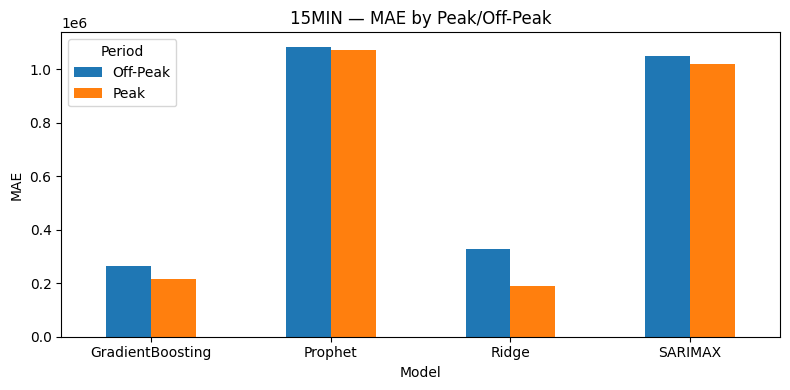

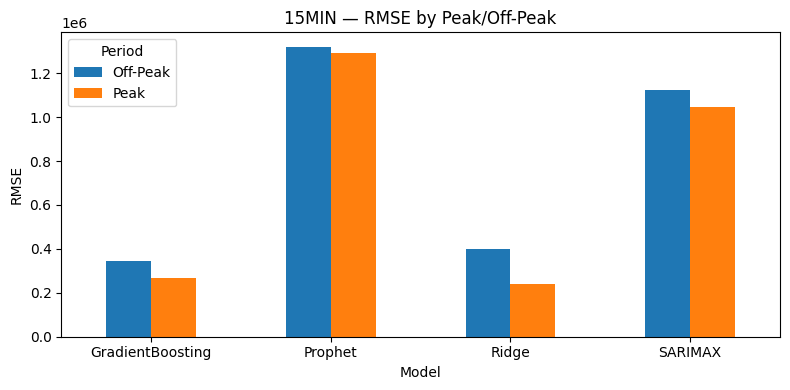

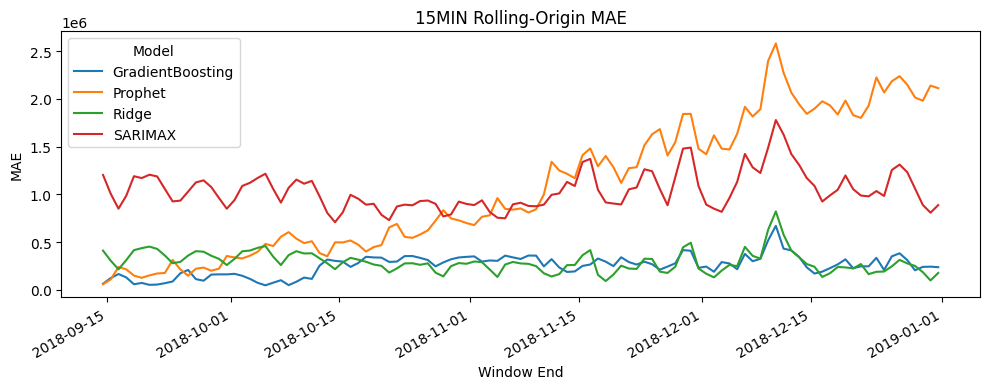

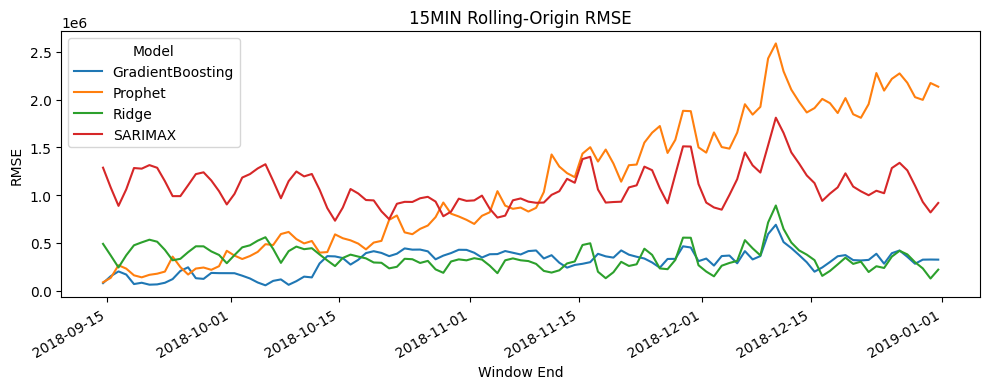

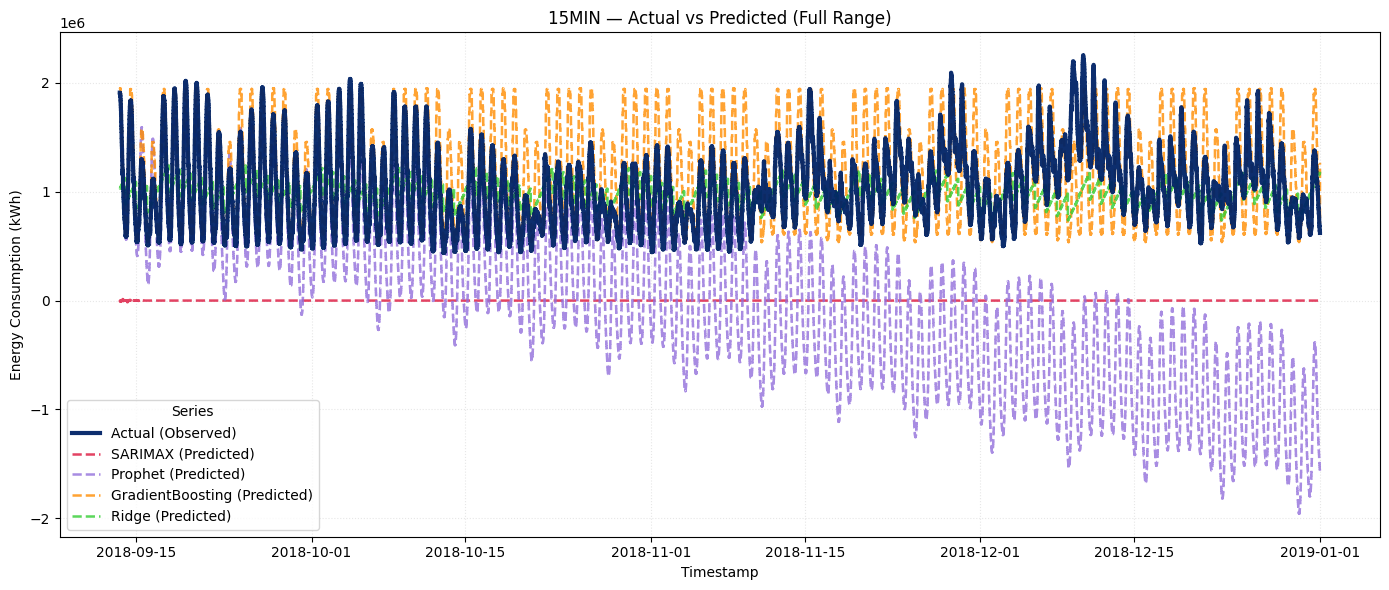

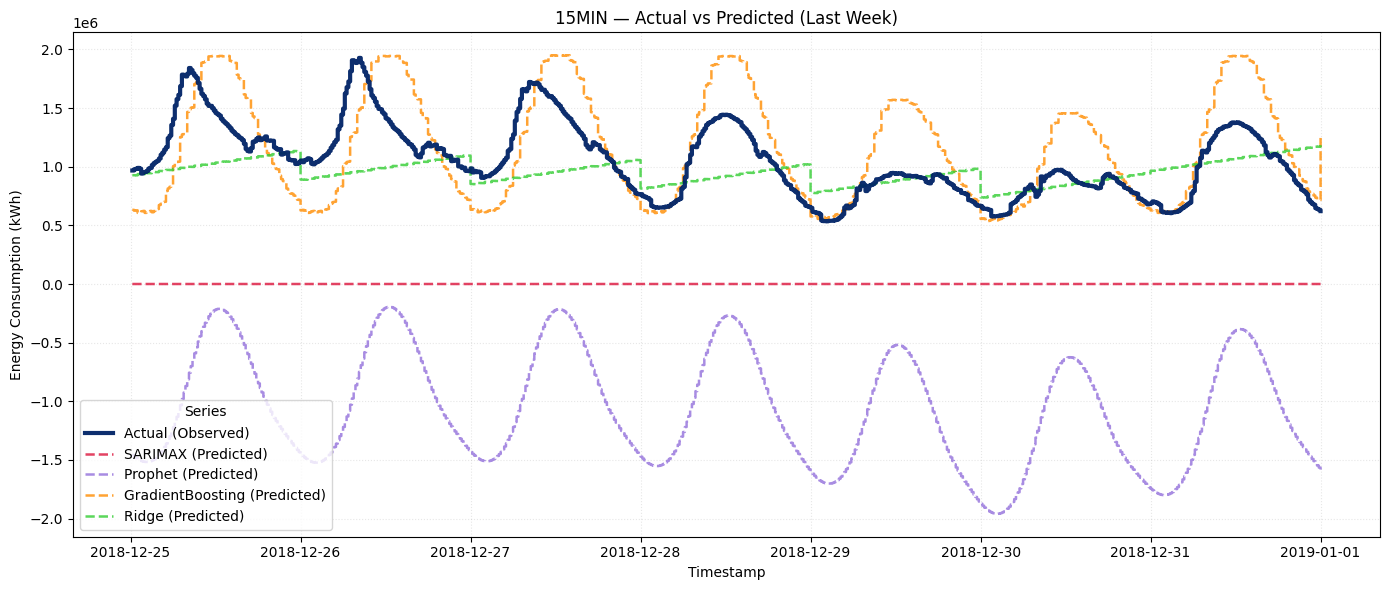


✅ Step 9 complete. Outputs saved to: /content/analysis_outputs/variation_analysis


In [ ]:
# =========================
# STEP 9 — Variation Analysis & Rolling-Origin Backtests
# (with stair-step Actual vs Predicted timelines)
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path("/content/analysis_outputs")
PRED_DIRS = {
    "hourly": BASE / "preds_hourly",
    "15min":  BASE / "preds_15min"
}
VARIATION_DIR = BASE / "variation_analysis"
VARIATION_DIR.mkdir(parents=True, exist_ok=True)

MODELS = ["SARIMAX", "Prophet", "GradientBoosting", "Ridge"]

# ---------- Load helpers ----------
def _load(gran: str) -> pd.DataFrame:
    """Load y_test (actual) and any available model predictions into one DataFrame."""
    p = PRED_DIRS[gran]
    y_path = p / f"y_test_{gran}.csv"
    if not y_path.exists():
        raise FileNotFoundError(f"[{gran}] y_test not found at {y_path}. Run Step 6 first.")
    y_true = pd.read_csv(y_path, index_col=0).iloc[:, 0].rename("y_actual")

    df = pd.DataFrame({"y_actual": y_true})
    for m in MODELS:
        f = p / f"pred_{m}.csv"
        if f.exists():
            s = pd.read_csv(f, index_col=0).iloc[:, 0]
            df[f"y_pred_{m}"] = s.reindex(df.index)

    # ensure datetime index
    df.index = pd.to_datetime(df.index, errors="coerce")
    df = df[df.index.notna()].sort_index()

    # time keys
    df["hour"]  = df.index.hour
    df["dow"]   = df.index.dayofweek
    df["month"] = df.index.month
    return df

def _mae(y, yhat):  return float(np.mean(np.abs(y - yhat)))
def _rmse(y, yhat): return float(np.sqrt(np.mean((y - yhat) ** 2)))

# ---------- Variation: by hour / DOW / month ----------
def analyze_variation(df: pd.DataFrame, gran: str):
    models = [c.replace("y_pred_", "") for c in df.columns if c.startswith("y_pred_")]
    if not models:
        print(f"ℹ️ {gran.upper()} — No predictions available for variation analysis.")
        return {}
    results = {}
    for key in ["hour", "dow", "month"]:
        grp = df.groupby(key)
        tables = []
        for m in models:
            mae_by = grp.apply(lambda g: _mae(g["y_actual"], g[f"y_pred_{m}"])).rename(f"MAE_{m}")
            tables.append(mae_by)
        table = pd.concat(tables, axis=1)
        results[key] = table

        # Save CSV
        out_csv = VARIATION_DIR / f"var_{gran}_{key}.csv"
        table.to_csv(out_csv)

        # Plot
        plt.figure(figsize=(10, 4))
        table.plot(ax=plt.gca(), title=f"{gran.upper()} — MAE by {key.upper()}")
        plt.ylabel("MAE (kWh)")
        plt.xlabel(key.upper())
        plt.tight_layout()
        plt.savefig(VARIATION_DIR / f"var_{gran}_{key}.png", dpi=140)
        plt.show()
    return results

# ---------- Peak vs Off-peak ----------
def analyze_peak(df: pd.DataFrame, gran: str, peak_hours=(16, 21)):
    """Default peak window = 16–21 inclusive (local convention)."""
    start, end = peak_hours
    df = df.copy()
    df["peak"] = df["hour"].between(start, end).astype(int)

    models = [c.replace("y_pred_", "") for c in df.columns if c.startswith("y_pred_")]
    if not models:
        print(f"ℹ️ {gran.upper()} — No predictions available for peak/off-peak analysis.")
        return pd.DataFrame()

    rows = []
    for m in models:
        for is_peak in [0, 1]:
            part = df[df["peak"] == is_peak]
            if not part.empty:
                rows.append({
                    "Model": m,
                    "Period": "Peak" if is_peak else "Off-Peak",
                    "MAE":  _mae(part["y_actual"], part[f"y_pred_{m}"]),
                    "RMSE": _rmse(part["y_actual"], part[f"y_pred_{m}"])
                })
    res = pd.DataFrame(rows)
    # Save + show
    out_csv = VARIATION_DIR / f"peak_vs_offpeak_{gran}.csv"
    res.to_csv(out_csv, index=False)
    print(f"\n⚡ {gran.upper()} — Peak vs Off-Peak error")
    try:
        display(res)
    except:
        print(res)

    # Plot grouped bars for MAE and RMSE
    if not res.empty:
        for metric in ["MAE", "RMSE"]:
            pivot = res.pivot(index="Model", columns="Period", values=metric).fillna(np.nan)
            plt.figure(figsize=(8, 4))
            pivot.plot(kind="bar", ax=plt.gca())
            plt.title(f"{gran.upper()} — {metric} by Peak/Off-Peak")
            plt.ylabel(metric)
            plt.xlabel("Model")
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.savefig(VARIATION_DIR / f"{gran}_peak_offpeak_{metric}.png", dpi=140)
            plt.show()
    return res

# ---------- Rolling-origin backtests (using test window splits) ----------
def rolling_origin_backtest(df: pd.DataFrame, gran: str, window: int):
    """
    Rolling-origin evaluation over the test DataFrame to show stability.
    window = block size (e.g., 168 for hourly ~ 1 week; 96 for 15-min ~ 1 day).
    """
    models = [c.replace("y_pred_", "") for c in df.columns if c.startswith("y_pred_")]
    if not models:
        print(f"ℹ️ {gran.upper()} — No predictions available for rolling-origin backtest.")
        return pd.DataFrame()

    entries = []
    n = len(df)
    # step by 'window'; evaluate next 'window' as holdout each time
    for i in range(0, n - window + 1, window):
        test = df.iloc[i:i + window]
        if test.empty:
            continue
        wend = test.index[-1]
        for m in models:
            y = test["y_actual"].astype(float)
            yhat = test[f"y_pred_{m}"].astype(float)
            entries.append({
                "WindowEnd": wend,
                "Model": m,
                "MAE": _mae(y, yhat),
                "RMSE": _rmse(y, yhat)
            })
    bt = pd.DataFrame(entries)
    if bt.empty:
        print(f"ℹ️ {gran.upper()} — Not enough data for rolling-origin with window={window}.")
        return bt

    # Save CSV
    out_csv = VARIATION_DIR / f"rolling_origin_{gran}.csv"
    bt.to_csv(out_csv, index=False)

    # Plot MAE / RMSE over windows
    for metric in ["MAE", "RMSE"]:
        pivot = bt.pivot(index="WindowEnd", columns="Model", values=metric)
        plt.figure(figsize=(10, 4))
        pivot.plot(ax=plt.gca(), title=f"{gran.upper()} Rolling-Origin {metric}")
        plt.ylabel(metric)
        plt.xlabel("Window End")
        plt.tight_layout()
        plt.savefig(VARIATION_DIR / f"rolling_origin_{gran}_{metric}.png", dpi=140)
        plt.show()
    return bt

# ---------- Actual vs Predicted timelines (stair-step storytelling) ----------
def plot_actual_vs_predicted(df: pd.DataFrame, gran: str):
    """
    Overlay Actual (dark, bold) vs each model (lighter) with stair-step lines.
    - For 15min: show FULL RANGE + ZOOM.
    - For hourly: ONLY ZOOM (full range is already covered in Step 8).
    """
    models = [c.replace("y_pred_", "") for c in df.columns if c.startswith("y_pred_")]
    color_map = {
        "SARIMAX": "#DC143C",          # crimson
        "Prophet": "#9370DB",          # purple
        "GradientBoosting": "#FF8C00", # orange
        "Ridge": "#32CD32"             # lime green
    }

    # --- Helper to draw one plot ---
    def _draw(ax_df, title_suffix, save_name):
        plt.figure(figsize=(14, 6))
        # Actual: dark, bold, stair-step
        plt.plot(
            ax_df.index, ax_df["y_actual"],
            label="Actual (Observed)",
            color="#002366",
            linewidth=3.0,
            linestyle="-",
            alpha=0.95,
            drawstyle="steps-post",
            zorder=5
        )
        # Predictions: lighter, stair-step
        for m in models:
            col = f"y_pred_{m}"
            if col in ax_df.columns:
                plt.plot(
                    ax_df.index, ax_df[col],
                    label=f"{m} (Predicted)",
                    color=color_map.get(m, "gray"),
                    linewidth=1.8,
                    linestyle="--",
                    alpha=0.8,
                    drawstyle="steps-post"
                )
        plt.title(f"{gran.upper()} — Actual vs Predicted ({title_suffix})")
        plt.xlabel("Timestamp")
        plt.ylabel("Energy Consumption (kWh)")
        plt.legend(title="Series", frameon=True)
        plt.grid(alpha=0.3, linestyle=":")
        plt.tight_layout()
        plt.savefig(VARIATION_DIR / save_name, dpi=150)
        plt.show()

    # 15min: FULL RANGE + ZOOM
    if gran == "15min":
        _draw(df, "Full Range", f"{gran}_actual_vs_predicted_full.png")

    # both: ZOOM (hourly-only here; 15min gets both)
    zoom_n = 168 if gran == "hourly" else 672  # ~1 week view (hourly=168h, 15min=672*15min)
    if len(df) > zoom_n:
        sub = df.tail(zoom_n)
        _draw(sub, "Last Week", f"{gran}_actual_vs_predicted_zoom.png")
    else:
        # If not enough points for a week, still draw what we have
        _draw(df, "Last Window", f"{gran}_actual_vs_predicted_zoom.png")

# ---------- Run for both granularities ----------
for gran in ["hourly", "15min"]:
    print(f"\n==============================\n{gran.upper()} — VARIATION & BACKTEST\n==============================")
    df = _load(gran)

    # 1) Variation by Hour / DOW / Month
    _ = analyze_variation(df, gran)

    # 2) Peak vs Off-peak comparison
    _ = analyze_peak(df, gran, peak_hours=(16, 21))  # adjust window if needed

    # 3) Rolling-origin backtests (set window size per granularity)
    window = 168 if gran == "hourly" else 96
    _ = rolling_origin_backtest(df, gran, window=window)

    # 4) Actual vs Predicted timelines (stair-step)
    plot_actual_vs_predicted(df, gran)

print(f"\n✅ Step 9 complete. Outputs saved to: {VARIATION_DIR}")



HOURLY — Step 10


<Figure size 800x360 with 0 Axes>

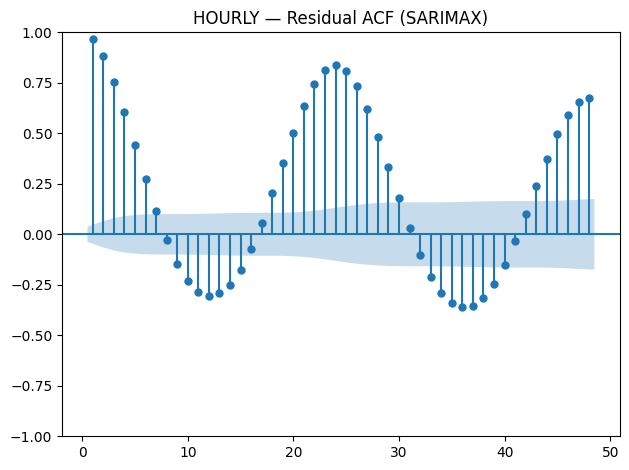

<Figure size 800x360 with 0 Axes>

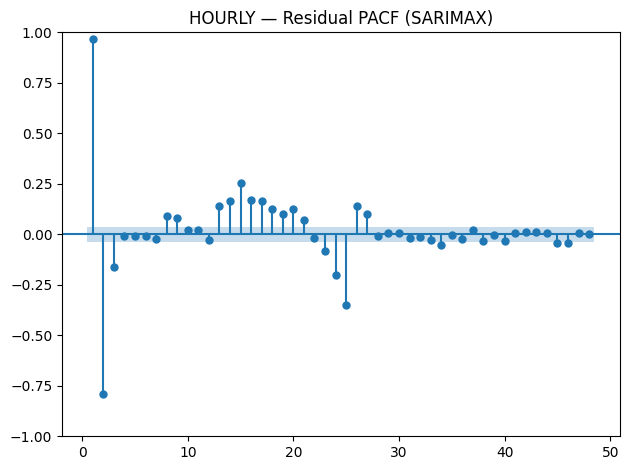

<Figure size 800x360 with 0 Axes>

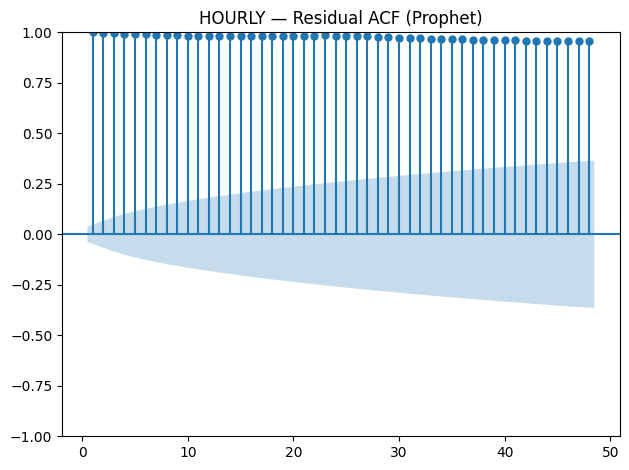

<Figure size 800x360 with 0 Axes>

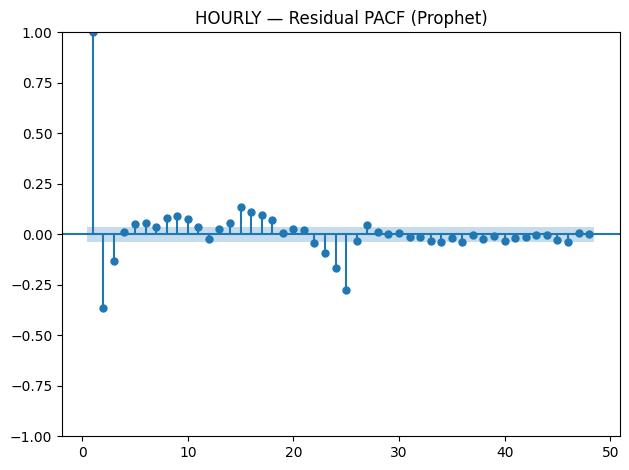

<Figure size 800x360 with 0 Axes>

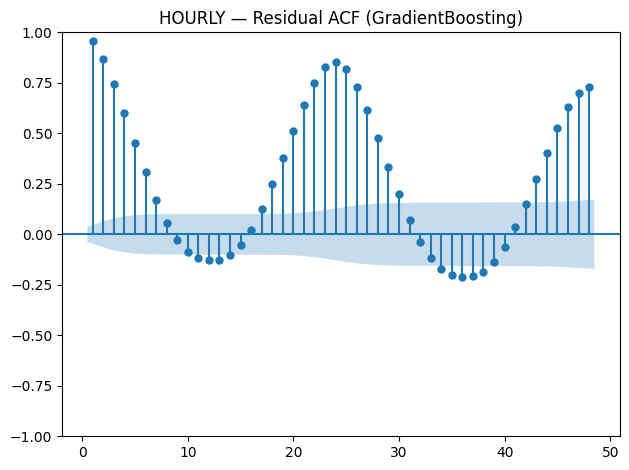

<Figure size 800x360 with 0 Axes>

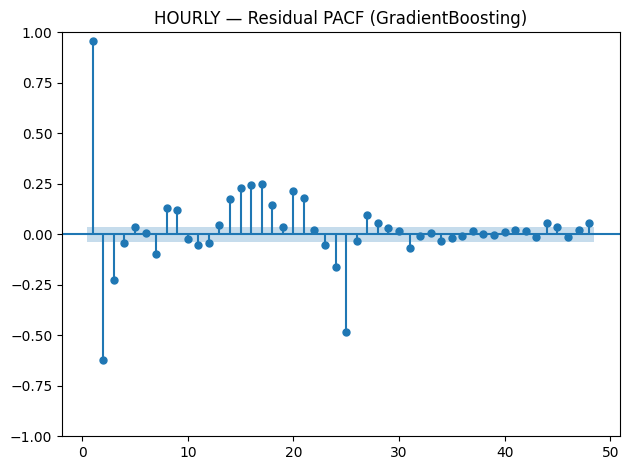

<Figure size 800x360 with 0 Axes>

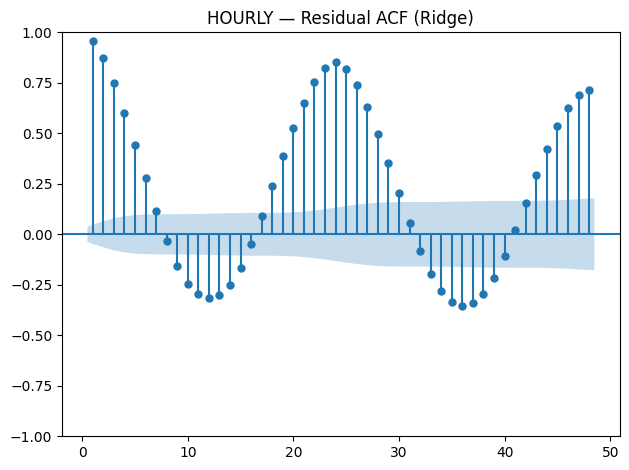

<Figure size 800x360 with 0 Axes>

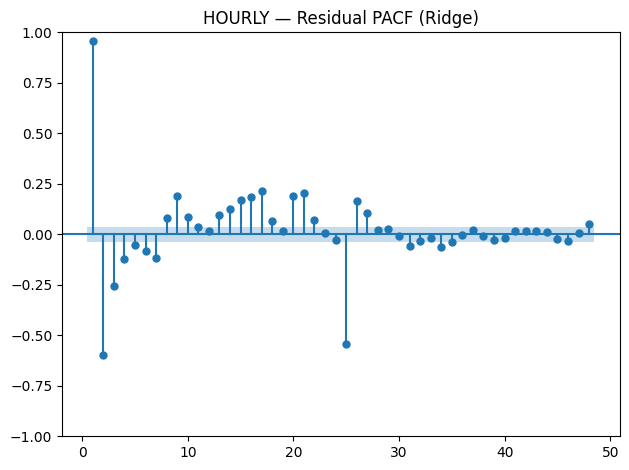

💾 Saved Ljung–Box summary: /content/analysis_outputs/step10_residuals_and_importance/hourly/residuals/ljungbox_summary.csv
ℹ️ HOURLY — GBR importance skipped: No model dir /content/analysis_outputs/models_hourly; skipping.
ℹ️ HOURLY — Ridge importance skipped: No model dir /content/analysis_outputs/models_hourly; skipping.

15MIN — Step 10


<Figure size 800x360 with 0 Axes>

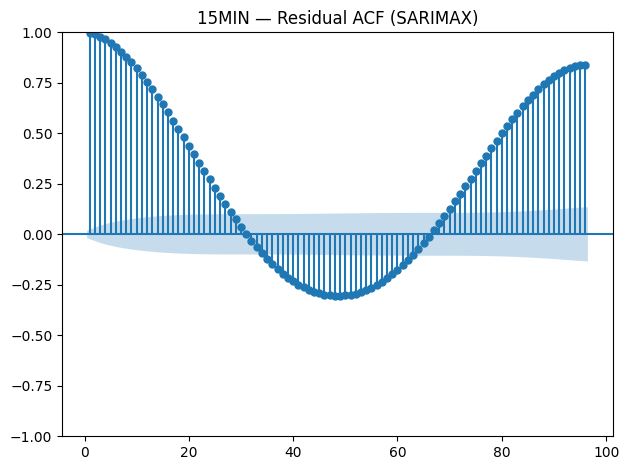

<Figure size 800x360 with 0 Axes>

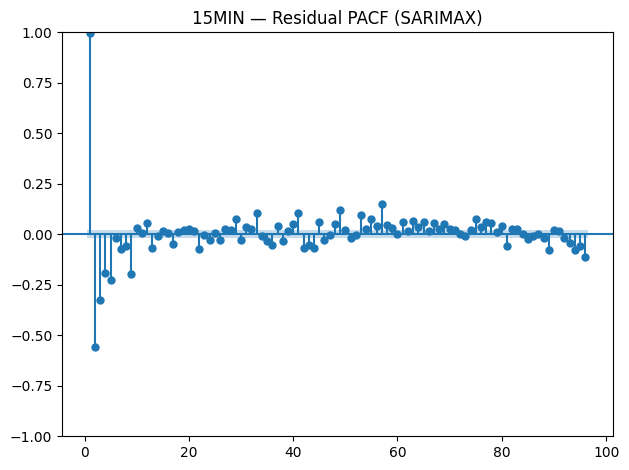

<Figure size 800x360 with 0 Axes>

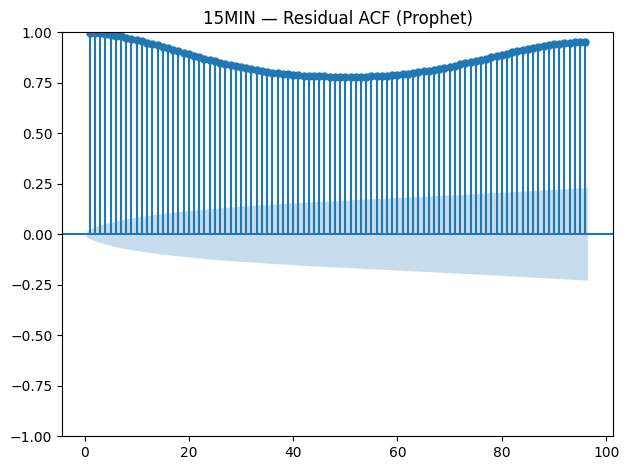

<Figure size 800x360 with 0 Axes>

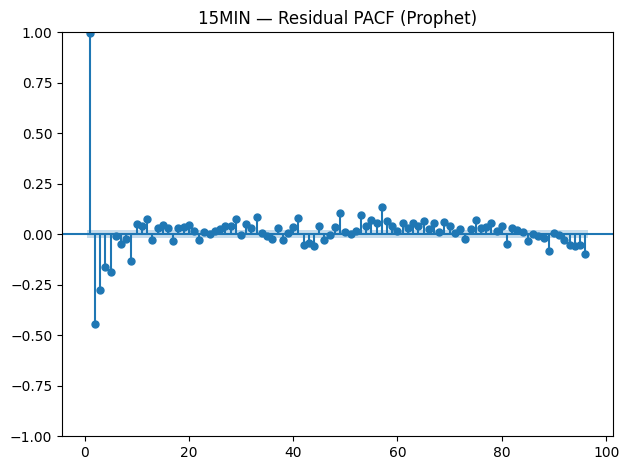

<Figure size 800x360 with 0 Axes>

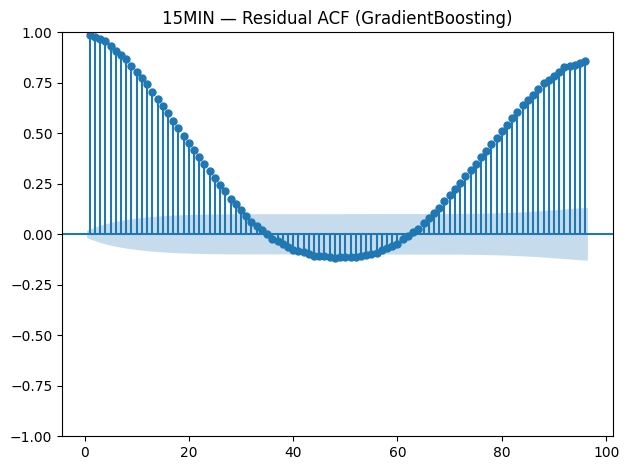

<Figure size 800x360 with 0 Axes>

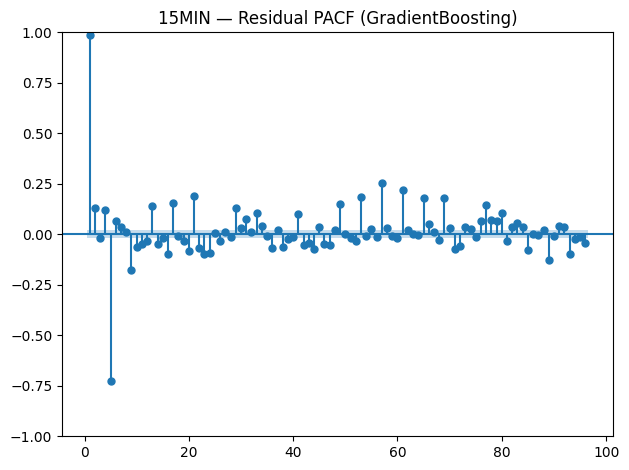

<Figure size 800x360 with 0 Axes>

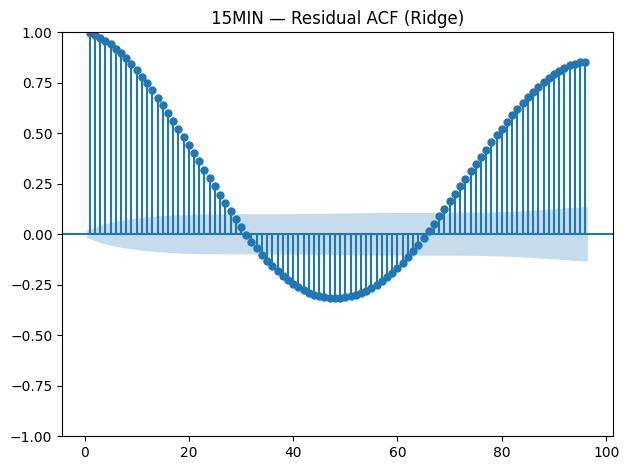

<Figure size 800x360 with 0 Axes>

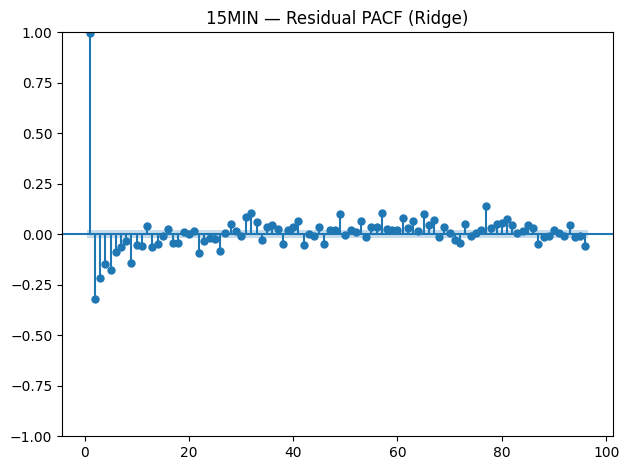

💾 Saved Ljung–Box summary: /content/analysis_outputs/step10_residuals_and_importance/15min/residuals/ljungbox_summary.csv
ℹ️ 15MIN — GBR importance skipped: No model dir /content/analysis_outputs/models_15min; skipping.
ℹ️ 15MIN — Ridge importance skipped: No model dir /content/analysis_outputs/models_15min; skipping.

✅ Step 10 done. Outputs in: /content/analysis_outputs/step10_residuals_and_importance


In [ ]:
# =========================
# STEP 10 — Residual ACF/PACF + Feature Importance (GBR & Ridge)
# =========================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Try to load models if available
try:
    import joblib
except ImportError:
    joblib = None

BASE = Path("/content/analysis_outputs")
PRED_DIRS = {"hourly": BASE / "preds_hourly", "15min": BASE / "preds_15min"}
MODEL_DIRS = {"hourly": BASE / "models_hourly", "15min": BASE / "models_15min"}

OUT10 = BASE / "step10_residuals_and_importance"
OUT10.mkdir(parents=True, exist_ok=True)

MODELS = ["SARIMAX", "Prophet", "GradientBoosting", "Ridge"]

# ---------- helpers ----------
def _load_truth_preds(gran: str) -> pd.DataFrame:
    """Return a frame: y_actual + y_pred_* with datetime index."""
    p = PRED_DIRS[gran]
    y_path = p / f"y_test_{gran}.csv"
    if not y_path.exists():
        raise FileNotFoundError(f"[{gran}] Missing {y_path}. Run Step 6.")

    df = pd.read_csv(y_path, index_col=0)
    # If single col, make it a series, else use first column as y_actual
    if isinstance(df, pd.DataFrame) and df.shape[1] >= 1:
        y_actual = df.iloc[:, 0].rename("y_actual")
    else:
        y_actual = df.squeeze("columns").rename("y_actual")

    frame = pd.DataFrame({"y_actual": y_actual})
    for m in MODELS:
        f = p / f"pred_{m}.csv"
        if f.exists():
            s = pd.read_csv(f, index_col=0).squeeze("columns")
            frame[f"y_pred_{m}"] = s.reindex(frame.index)

    # ensure DatetimeIndex
    frame.index = pd.to_datetime(frame.index, errors="coerce")
    frame = frame[frame.index.notna()].sort_index()
    return frame

def _lag_params(gran: str):
    """Return (nlags_acf, nlags_pacf, ljung_lags) for plots/tests."""
    if gran == "hourly":
        return 48, 48, [24, 48]   # up to 2 days
    else:
        return 96, 96, [96, 192]  # up to 1–2 days at 15-min (96=1 day)

def _save_residual_series(resid: pd.Series, gran: str, model: str):
    outdir = OUT10 / gran / "residuals"
    outdir.mkdir(parents=True, exist_ok=True)
    resid.to_csv(outdir / f"residuals_{model}.csv")

def _plot_residual_acf_pacf(resid: pd.Series, gran: str, model: str, nlags_acf: int, nlags_pacf: int):
    outdir = OUT10 / gran / "residuals"
    outdir.mkdir(parents=True, exist_ok=True)

    # ACF
    plt.figure(figsize=(8, 3.6))
    plot_acf(resid.dropna(), lags=nlags_acf, zero=False)
    plt.title(f"{gran.upper()} — Residual ACF ({model})")
    plt.tight_layout()
    plt.savefig(outdir / f"acf_{model}.png", dpi=140)
    plt.show()

    # PACF
    plt.figure(figsize=(8, 3.6))
    plot_pacf(resid.dropna(), lags=nlags_pacf, zero=False, method="ywm")
    plt.title(f"{gran.upper()} — Residual PACF ({model})")
    plt.tight_layout()
    plt.savefig(outdir / f"pacf_{model}.png", dpi=140)
    plt.show()

def _ljung_box(resid: pd.Series, lags_list: list[int], gran: str, model: str):
    outdir = OUT10 / gran / "residuals"
    outdir.mkdir(parents=True, exist_ok=True)
    rows = []
    for mlag in lags_list:
        lb = acorr_ljungbox(resid.dropna(), lags=[mlag], return_df=True)
        # lb returns df with index=lag; pick the row
        row = lb.iloc[-1]
        rows.append({"lags": mlag, "lb_stat": float(row["lb_stat"]), "lb_pvalue": float(row["lb_pvalue"])})
    df = pd.DataFrame(rows)
    df.to_csv(outdir / f"ljungbox_{model}.csv", index=False)
    return df

def _load_model_if_any(gran: str, model_name: str):
    """Attempt to load fitted models saved in Step 6. Return (model_object, info_string)."""
    if joblib is None:
        return None, "joblib not installed; skipping model load."
    mdir = MODEL_DIRS[gran]
    if not mdir.exists():
        return None, f"No model dir {mdir}; skipping."
    # possible filenames
    candidates = [
        mdir / f"{model_name}.joblib",
        mdir / f"model_{model_name}.joblib",
        mdir / f"{model_name.lower()}.joblib"
    ]
    for c in candidates:
        if c.exists():
            try:
                return joblib.load(c), f"Loaded {c.name}"
            except Exception as e:
                return None, f"Failed loading {c.name}: {e}"
    return None, f"No {model_name} file in {mdir}."

def _feature_names(gran: str) -> list[str]:
    """Default time features used in Step 6; 15-min includes 'minute' & 'quarter'."""
    if gran == "hourly":
        return ["hour", "day_of_week", "month"]
    else:
        return ["hour", "minute", "quarter", "day_of_week", "month"]

def _plot_importances(series: pd.Series, gran: str, title: str, fname: str):
    outdir = OUT10 / gran / "feature_importance"
    outdir.mkdir(parents=True, exist_ok=True)
    s = series.sort_values(ascending=True)

    plt.figure(figsize=(7, 4.5))
    s.plot(kind="barh")
    plt.title(title)
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.savefig(outdir / fname, dpi=140)
    plt.show()

# ---------- main ----------
for gran in ["hourly", "15min"]:
    print(f"\n==============================\n{gran.upper()} — Step 10\n==============================")
    df = _load_truth_preds(gran)
    nlags_acf, nlags_pacf, lj_lags = _lag_params(gran)

    # ===== Residuals: ACF/PACF + Ljung-Box =====
    models_present = [m for m in MODELS if f"y_pred_{m}" in df.columns]
    if not models_present:
        print(f"ℹ️ {gran.upper()} — No predictions found; skipping residual diagnostics.")
    else:
        resid_summary = []
        for m in models_present:
            resid = (df["y_actual"].astype(float) - df[f"y_pred_{m}"].astype(float)).rename(f"resid_{m}")
            _save_residual_series(resid, gran, m)
            _plot_residual_acf_pacf(resid, gran, m, nlags_acf, nlags_pacf)
            lb = _ljung_box(resid, lj_lags, gran, m)
            # keep a quick summary line
            for _, r in lb.iterrows():
                resid_summary.append({
                    "Granularity": gran,
                    "Model": m,
                    "Lags": int(r["lags"]),
                    "LB_Stat": r["lb_stat"],
                    "LB_pvalue": r["lb_pvalue"]
                })
        if resid_summary:
            outcsv = OUT10 / gran / "residuals" / "ljungbox_summary.csv"
            pd.DataFrame(resid_summary).to_csv(outcsv, index=False)
            print(f"💾 Saved Ljung–Box summary: {outcsv}")

    # ===== Feature importance =====
    # Try to load GradientBoosting and Ridge models and show importance.
    feat_names = _feature_names(gran)

    # Gradient Boosting
    gbr, info = _load_model_if_any(gran, "GradientBoosting")
    if gbr is None:
        print(f"ℹ️ {gran.upper()} — GBR importance skipped: {info}")
    else:
        try:
            importances = getattr(gbr, "feature_importances_", None)
            if importances is None and hasattr(gbr, "steps"):
                # Pipeline case: last step
                last_est = gbr.steps[-1][1]
                importances = getattr(last_est, "feature_importances_", None)
            if importances is not None:
                imp_series = pd.Series(importances, index=feat_names, dtype=float)
                _plot_importances(imp_series, gran,
                                  f"{gran.upper()} — Gradient Boosting Feature Importance",
                                  "gbr_importance.png")
                # Save CSV
                outcsv = OUT10 / gran / "feature_importance" / "gbr_importance.csv"
                imp_series.rename("importance").to_csv(outcsv)
                print(f"💾 Saved GBR importance: {outcsv}")
            else:
                print(f"ℹ️ {gran.upper()} — GBR object has no feature_importances_.")
        except Exception as e:
            print(f"⚠️ {gran.upper()} — GBR importance failed: {e}")

    # Ridge (standardized coefficients if pipeline is available)
    ridge, info = _load_model_if_any(gran, "Ridge")
    if ridge is None:
        print(f"ℹ️ {gran.upper()} — Ridge importance skipped: {info}")
    else:
        try:
            coefs = None
            # If it's a Pipeline with scaler -> ridge
            if hasattr(ridge, "steps"):
                last_est = ridge.steps[-1][1]
                coefs = getattr(last_est, "coef_", None)
            else:
                coefs = getattr(ridge, "coef_", None)

            if coefs is not None:
                # Flatten if shape like (1, n_features)
                coefs = np.ravel(coefs)
                coef_series = pd.Series(coefs, index=feat_names, dtype=float).abs()  # magnitude
                _plot_importances(coef_series,
                                  gran,
                                  f"{gran.upper()} — Ridge Coefficient Magnitudes (std-scaled)",
                                  "ridge_coef_magnitude.png")
                # Save CSV
                outcsv = OUT10 / gran / "feature_importance" / "ridge_coefficients.csv"
                coef_series.rename("coef_abs").to_csv(outcsv)
                print(f"💾 Saved Ridge coefficients (abs): {outcsv}")
            else:
                print(f"ℹ️ {gran.upper()} — Ridge has no .coef_ available.")
        except Exception as e:
            print(f"⚠️ {gran.upper()} — Ridge importance failed: {e}")

print(f"\n✅ Step 10 done. Outputs in: {OUT10}")



HOURLY — SCOREBOARD


💾 Saved hourly scoreboard → /content/analysis_outputs/scoreboards/scoreboard_hourly.csv

15MIN — SCOREBOARD


💾 Saved 15min scoreboard → /content/analysis_outputs/scoreboards/scoreboard_15min.csv


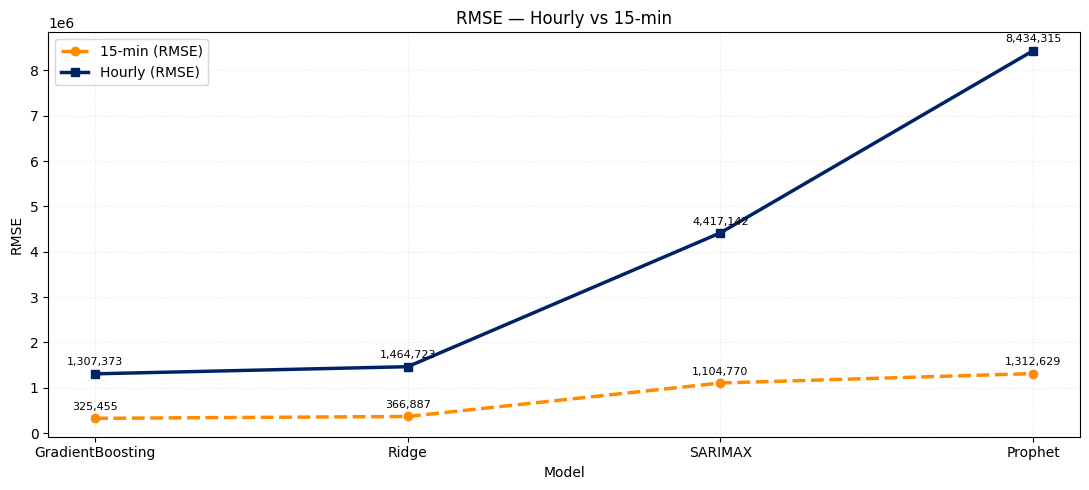

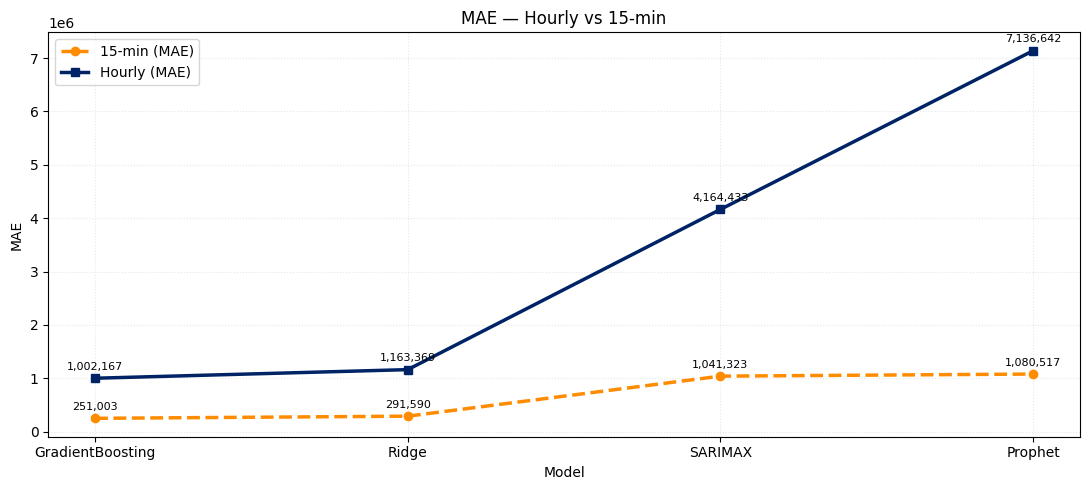

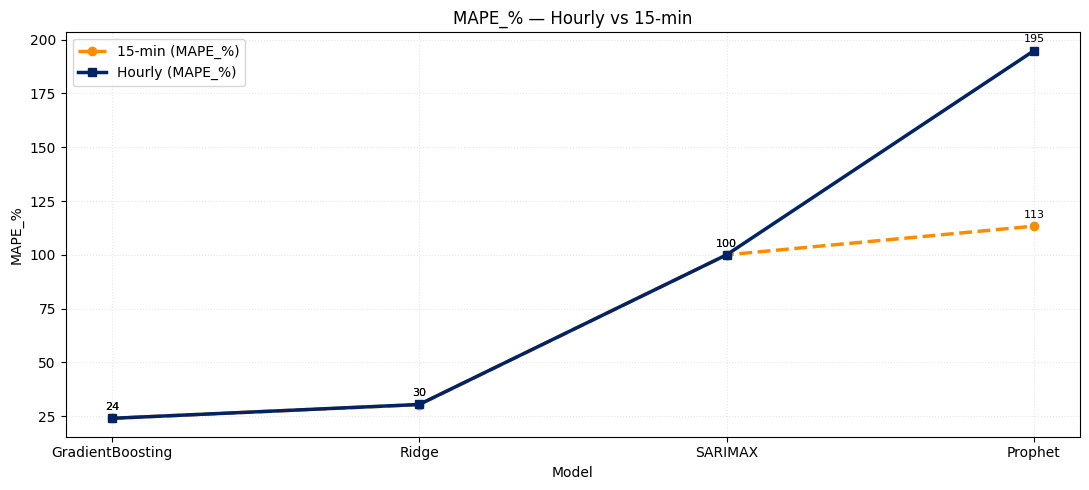


✅ Step 8 complete. Line scoreboards saved to: /content/analysis_outputs/scoreboards


In [ ]:
# =========================
# STEP 8 — Combined Scoreboards (15-min + Hourly) with Line Visualizations
# =========================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path("/content/analysis_outputs")
OUT_SB = BASE / "scoreboards"
OUT_SB.mkdir(parents=True, exist_ok=True)

PRED_DIRS = {
    "hourly": BASE / "preds_hourly",
    "15min":  BASE / "preds_15min"
}
# Models we’ll look for (must match filenames saved in Step 6: pred_<Model>.csv)
MODELS = ["GradientBoosting", "Ridge", "Prophet", "SARIMAX"]

# ---------- Metric helpers ----------
def _mae(y, yhat):  return float(np.mean(np.abs(y - yhat)))
def _rmse(y, yhat): return float(np.sqrt(np.mean((y - yhat) ** 2)))
def _mape(y, yhat): return float(np.mean(np.abs((y - yhat) / (y + 1e-8))) * 100)

# ---------- Loaders ----------
def load_data(gran: str):
    """
    Load y_test_<gran>.csv and available pred_<Model>.csv files saved by Step 6.
    Returns (y_true: Series, preds: dict[model -> Series aligned to y_true.index]).
    """
    base = PRED_DIRS[gran]
    y_path = base / f"y_test_{gran}.csv"
    if not y_path.exists():
        raise FileNotFoundError(f"[{gran}] Missing {y_path}. Run Step 6 first.")

    y_true = pd.read_csv(y_path, index_col=0).squeeze("columns")
    y_true.index = pd.to_datetime(y_true.index, errors="coerce")
    y_true = y_true.dropna().sort_index()

    preds = {}
    for m in MODELS:
        f = base / f"pred_{m}.csv"
        if f.exists():
            s = pd.read_csv(f, index_col=0).squeeze("columns")
            s.index = pd.to_datetime(s.index, errors="coerce")
            s = s.dropna().sort_index().reindex(y_true.index)
            preds[m] = s.astype(float)
    return y_true.astype(float), preds

# ---------- Scoreboard builder ----------
def compute_scoreboard(y_true: pd.Series, preds: dict) -> pd.DataFrame:
    rows = []
    for m, yhat in preds.items():
        rows.append({
            "Model": m,
            "MAE": _mae(y_true, yhat),
            "RMSE": _rmse(y_true, yhat),
            "MAPE_%": _mape(y_true, yhat)
        })
    if not rows:
        return pd.DataFrame(columns=["MAE","RMSE","MAPE_%"])
    df = pd.DataFrame(rows).set_index("Model")
    # sort by RMSE ascending for readability
    return df.sort_values("RMSE")

def styled_show(df: pd.DataFrame, title: str):
    try:
        display(df.style.format({"MAE":"{:,.0f}","RMSE":"{:,.0f}","MAPE_%":"{:.2f}"}).set_caption(title))
    except NameError:
        print(f"\n{title}\n{df.round(2)}")

# ---------- Line chart visualization (no single bars) ----------
def plot_line_scoreboards(hourly_df: pd.DataFrame, min15_df: pd.DataFrame):
    """
    Draw line charts comparing RMSE / MAE / MAPE_% for Hourly vs 15-min across models.
    Each metric gets one chart with two lines (Hourly, 15-min).
    """
    metrics = ["RMSE", "MAE", "MAPE_%"]
    colors = {"hourly": "#002366", "15min": "#FF8C00"}   # dark blue vs orange
    linestyles = {"hourly": "-", "15min": "--"}
    markers = {"hourly": "s", "15min": "o"}

    # Align model order across both frames
    all_models = list(dict.fromkeys(
        list(hourly_df.index if not hourly_df.empty else []) +
        list(min15_df.index if not min15_df.empty else [])
    ))
    if not hourly_df.empty:
        hourly_df = hourly_df.reindex(all_models)
    if not min15_df.empty:
        min15_df = min15_df.reindex(all_models)

    for metric in metrics:
        plt.figure(figsize=(11, 5))
        # 15-min
        if not min15_df.empty and metric in min15_df.columns:
            plt.plot(
                min15_df.index, min15_df[metric],
                label=f"15-min ({metric})",
                color=colors["15min"],
                linestyle=linestyles["15min"],
                linewidth=2.5,
                marker=markers["15min"]
            )
            # annotate values
            for x, y in zip(min15_df.index, min15_df[metric].values):
                plt.annotate(f"{y:,.0f}", (x, y), textcoords="offset points", xytext=(0, 6), ha="center", fontsize=8)

        # Hourly
        if not hourly_df.empty and metric in hourly_df.columns:
            plt.plot(
                hourly_df.index, hourly_df[metric],
                label=f"Hourly ({metric})",
                color=colors["hourly"],
                linestyle=linestyles["hourly"],
                linewidth=2.5,
                marker=markers["hourly"]
            )
            # annotate values
            for x, y in zip(hourly_df.index, hourly_df[metric].values):
                plt.annotate(f"{y:,.0f}", (x, y), textcoords="offset points", xytext=(0, 6), ha="center", fontsize=8)

        plt.title(f"{metric} — Hourly vs 15-min")
        plt.xlabel("Model")
        plt.ylabel(metric)
        plt.grid(alpha=0.3, linestyle=":")
        plt.legend()
        plt.tight_layout()
        plt.savefig(OUT_SB / f"line_comparison_{metric.lower()}.png", dpi=150)
        plt.show()

# ---------- Main run ----------
scoreboard_hourly = pd.DataFrame()
scoreboard_15min  = pd.DataFrame()

for gran in ["hourly", "15min"]:
    print(f"\n==============================\n{gran.upper()} — SCOREBOARD\n==============================")
    y_true, preds = load_data(gran)
    if not preds:
        print(f"⚠️ No predictions found for {gran}. Skipping.")
        continue

    sb = compute_scoreboard(y_true, preds)
    styled_show(sb, f"{gran.upper()} Scoreboard (lower is better)")

    out_csv = OUT_SB / f"scoreboard_{gran}.csv"
    sb.to_csv(out_csv)
    print(f"💾 Saved {gran} scoreboard → {out_csv}")

    if gran == "hourly":
        scoreboard_hourly = sb.copy()
    else:
        scoreboard_15min = sb.copy()

# Combined line visualizations
if not scoreboard_hourly.empty and not scoreboard_15min.empty:
    plot_line_scoreboards(scoreboard_hourly, scoreboard_15min)

# Save combined table too (optional)
if not scoreboard_hourly.empty or not scoreboard_15min.empty:
    frames = []
    if not scoreboard_hourly.empty:
        a = scoreboard_hourly.copy(); a["Granularity"] = "Hourly"; frames.append(a)
    if not scoreboard_15min.empty:
        b = scoreboard_15min.copy();  b["Granularity"] = "15-min"; frames.append(b)
    combo = pd.concat(frames)
    combo = combo.reset_index().set_index(["Granularity","Model"]).sort_values(["Granularity","RMSE"])
    combo.to_csv(OUT_SB / "scoreboard_combined.csv")

print(f"\n✅ Step 8 complete. Line scoreboards saved to: {OUT_SB}")


In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 106.5 MB/s eta 0:00:00


In [ ]:
# ====== Optimization Scaffold (LP/MILP via PuLP) ======
# Works for generic problems + energy examples (dispatch with/without binaries).

# 0) Install (only once in your environment):
# !pip install pulp

import pulp as pl
import numpy as np
import pandas as pd

# ---------- Example data (replace with your real inputs) ----------
# Suppose we want to meet a time-series demand at minimum cost using up to 2 resources.
# You can feed forecasts here, e.g. from Step 6: y_test (hourly) or y_test_15min (15-min).
T = 24  # number of periods (e.g., 24 hours)
idx = pd.date_range("2025-01-01", periods=T, freq="H")

demand = pd.Series(np.random.uniform(900, 1200, size=T), index=idx, name="demand_kW")

# Resource parameters (2 resources)
resources = ["A", "B"]
cost = {"A": 55.0, "B": 65.0}                 # $/MWh (or weight per kWh * 1000, keep units consistent)
capacity = {"A": 800.0, "B": 600.0}           # kW max per period
ramp_up = {"A": 500.0, "B": 500.0}            # optional, kW per period
ramp_dn = {"A": 500.0, "B": 500.0}

# ---------- 1) Pure LP Scaffold (continuous dispatch, no on/off binaries) ----------
def solve_dispatch_LP(demand_series, resources, cost, capacity, ramp_up=None, ramp_dn=None, solver=None):
    """
    Min-cost dispatch to meet demand each period using continuous outputs x[r,t].
    Returns a DataFrame of dispatch and the PuLP model.
    """
    periods = list(demand_series.index)
    m = pl.LpProblem("MinCost_Dispatch_LP", pl.LpMinimize)

    # Decision: power output of resource r in period t (continuous >= 0)
    x = pl.LpVariable.dicts("x", (resources, periods), lowBound=0, cat="Continuous")

    # Objective: sum(cost * output)
    m += pl.lpSum(cost[r] * x[r][t] for r in resources for t in periods), "TotalCost"

    # Demand balance: sum_r x[r,t] >= demand[t]  (use == if you must exactly meet)
    for t in periods:
        m += pl.lpSum(x[r][t] for r in resources) >= float(demand_series.loc[t]), f"demand_{t}"

    # Capacity per period
    for r in resources:
        for t in periods:
            m += x[r][t] <= capacity[r], f"cap_{r}_{t}"

    # Optional ramping constraints (|x_t - x_{t-1}| <= ramp)
    if ramp_up or ramp_dn:
        for r in resources:
            for t_prev, t_curr in zip(periods[:-1], periods[1:]):
                if ramp_up:
                    m += x[r][t_curr] - x[r][t_prev] <= ramp_up[r], f"ramp_up_{r}_{t_curr}"
                if ramp_dn:
                    m += x[r][t_prev] - x[r][t_curr] <= ramp_dn[r], f"ramp_dn_{r}_{t_curr}"

    # Solve
    m.solve(solver or pl.PULP_CBC_CMD(msg=False))

    # Collect solution
    sol = pd.DataFrame({r: [pl.value(x[r][t]) for t in periods] for r in resources}, index=periods)
    sol["Total"] = sol.sum(axis=1)
    sol.attrs["objective"] = pl.value(m.objective)
    return sol, m

# Usage (LP):
lp_dispatch, lp_model = solve_dispatch_LP(demand, resources, cost, capacity, ramp_up, ramp_dn)
print("LP Objective (Total Cost):", lp_dispatch.attrs["objective"])
display(lp_dispatch.head())

# ---------- 2) MILP Scaffold (adds on/off binaries, startup costs, min up/down) ----------
def solve_dispatch_MILP(demand_series, resources, cost, capacity,
                        fixed_cost=None, startup_cost=None,
                        min_output=None, ramp_up=None, ramp_dn=None,
                        min_up_time=None, min_down_time=None,
                        bigM=None, solver=None):
    """
    Mixed-Integer version with on/off binaries y[r,t] and output x[r,t].
    - x[r,t] <= capacity[r] * y[r,t]
    - Optional fixed cost and startup cost
    - Optional min-output when on: x[r,t] >= min_output[r] * y[r,t]
    - Optional ramping, min up/down times (basic form)
    """
    periods = list(demand_series.index)
    T = len(periods)
    fixed_cost = fixed_cost or {r: 0.0 for r in resources}
    startup_cost = startup_cost or {r: 0.0 for r in resources}
    min_output = min_output or {r: 0.0 for r in resources}
    ramp_up = ramp_up or {r: float("inf") for r in resources}
    ramp_dn = ramp_dn or {r: float("inf") for r in resources}
    bigM = bigM or max(capacity.values())  # used for some linking constraints

    m = pl.LpProblem("MinCost_Dispatch_MILP", pl.LpMinimize)

    # Decisions
    x = pl.LpVariable.dicts("x", (resources, periods), lowBound=0, cat="Continuous")  # output
    y = pl.LpVariable.dicts("y", (resources, periods), lowBound=0, upBound=1, cat="Binary")  # on/off
    u = pl.LpVariable.dicts("u", (resources, periods), lowBound=0, upBound=1, cat="Binary")  # startup

    # Objective
    m += pl.lpSum(
        cost[r] * x[r][t] + fixed_cost[r] * y[r][t] + startup_cost[r] * u[r][t]
        for r in resources for t in periods
    ), "TotalCost"

    # Demand balance
    for t in periods:
        m += pl.lpSum(x[r][t] for r in resources) >= float(demand_series.loc[t]), f"demand_{t}"

    # Capacity and min-output when on
    for r in resources:
        for t in periods:
            m += x[r][t] <= capacity[r] * y[r][t], f"cap_on_{r}_{t}"
            if min_output[r] > 0:
                m += x[r][t] >= min_output[r] * y[r][t], f"min_out_{r}_{t}"

    # Startup linkage: u[r,t] = max(0, y[r,t] - y[r,t-1])
    for r in resources:
        prev = None
        for i, t in enumerate(periods):
            if i == 0:
                # first period: startup if y[r,t] = 1 and initial state is off (assume off)
                m += u[r][t] >= y[r][t], f"startup_first_lb_{r}_{t}"
                m += u[r][t] <= y[r][t], f"startup_first_ub_{r}_{t}"
            else:
                prev = periods[i-1]
                m += u[r][t] >= y[r][t] - y[r][prev], f"startup_lb_{r}_{t}"
                m += u[r][t] <= 1 - y[r][prev] + y[r][t], f"startup_ub_{r}_{t}"

    # Ramping
    for r in resources:
        for i in range(T-1):
            t, tn = periods[i], periods[i+1]
            m += x[r][tn] - x[r][t] <= ramp_up[r], f"ramp_up_{r}_{tn}"
            m += x[r][t] - x[r][tn] <= ramp_dn[r], f"ramp_dn_{r}_{tn}"

    # (Optional) Minimal up time / down time (basic formulation)
    # These are illustrative; tune for your needs.
    if min_up_time or min_down_time:
        mu = min_up_time or {r: 0 for r in resources}
        md = min_down_time or {r: 0 for r in resources}
        for r in resources:
            # Minimal up time: once started, must stay on for mu[r] periods
            k = int(mu[r])
            if k > 1:
                for i in range(T - k + 1):
                    window = periods[i:i+k]
                    # sum_{tau in window} y[r,tau] >= k * u[r,window[0]]
                    m += pl.lpSum(y[r][tau] for tau in window) >= k * u[r][window[0]], f"min_up_{r}_{i}"
            # Minimal down time can be added with additional binary vars or logic if needed.

    # Solve
    m.solve(solver or pl.PULP_CBC_CMD(msg=False))

    # Collect solution
    sol = pd.DataFrame({r: [pl.value(x[r][t]) for t in periods] for r in resources}, index=periods)
    sol_y = pd.DataFrame({r: [pl.value(y[r][t]) for t in periods] for r in resources}, index=periods)
    sol["Total"] = sol.sum(axis=1)
    sol.attrs["objective"] = pl.value(m.objective)
    return sol, sol_y, m

# Usage (MILP):
milp_dispatch, milp_onoff, milp_model = solve_dispatch_MILP(
    demand_series=demand,
    resources=resources,
    cost=cost,
    capacity=capacity,
    fixed_cost={"A": 200.0, "B": 180.0},     # $/period when on (optional)
    startup_cost={"A": 500.0, "B": 350.0},   # $ per start (optional)
    min_output={"A": 200.0, "B": 150.0},     # kW minimum when on (optional)
    ramp_up=ramp_up, ramp_dn=ramp_dn,        # optional
    min_up_time={"A": 2, "B": 2},            # stay on at least 2 periods after start (optional)
)

print("MILP Objective (Total Cost):", milp_dispatch.attrs["objective"])
display(milp_dispatch.head())
display(milp_onoff.head())


LP Objective (Total Cost): 1442212.7366499996


A          B       Total
2025-01-01 00:00:00  800.0  297.69957  1097.69957
2025-01-01 01:00:00  800.0  299.31841  1099.31841
2025-01-01 02:00:00  800.0  278.44514  1078.44514
2025-01-01 03:00:00  800.0  268.74620  1068.74620
2025-01-01 04:00:00  800.0  362.87414  1162.87414

MILP Objective (Total Cost): 1453608.0382499998


A          B       Total
2025-01-01 00:00:00  800.0  297.69957  1097.69957
2025-01-01 01:00:00  800.0  299.31841  1099.31841
2025-01-01 02:00:00  800.0  278.44514  1078.44514
2025-01-01 03:00:00  800.0  268.74620  1068.74620
2025-01-01 04:00:00  800.0  362.87414  1162.87414

A    B
2025-01-01 00:00:00  1.0  1.0
2025-01-01 01:00:00  1.0  1.0
2025-01-01 02:00:00  1.0  1.0
2025-01-01 03:00:00  1.0  1.0
2025-01-01 04:00:00  1.0  1.0